In [3]:
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
from upsetplot import UpSet, from_contents, plot, from_indicators
import numpy as np
import seaborn as sns 
from matplotlib.gridspec import GridSpec
import matplotlib.gridspec as gridspec
from matplotlib.colors import LinearSegmentedColormap

In [4]:
# 自定义颜色映射 （ 基因-模块关系热图用）
# colors = ["#D3D3D3", "white", "#730303DB"]  # #2e4b70 浅蓝色待使用
colors = ["#D3D3D3", "white", "#730303DB"] #777676
cmap_custom = LinearSegmentedColormap.from_list("custom_rdbu", colors)

# 自定义颜色映射 （ 基因-模块关系热图用）
# colors = ["#D3D3D3", '#4575b4',"white", "#d73027"]
colors = ["#D3D3D3", '#4575b4',"white", "#d73027"]  
cmap_custom_3 = LinearSegmentedColormap.from_list("custom_rdbu_3", colors)

In [5]:
#TF路径
with open("./allTFs_hg38.txt", "r") as f1:
    Tf = set(line.strip().upper() for line in f1)  # 去重并统一为大写

In [6]:
# 数据文件读取路径
dataset_info = {
    'Ome.I':{
        'meta':         './meta.csv/01.Oryzias_melastigma_intestine.anno.re-assign.epi.imm2.scVI.FN1.meta.csv',
        'module':       './modules2/01.Oryzias_melastigma_intestine60.modules4.0.csv',
        'modulescore':  './modules2/01.Oryzias_melastigma_intestine60.modulescore4.0.csv',
        'one2one':      './one2one.rank2/oryzias.Hm.rank2.one2one',
    },
    'Ome.D':{
        'meta':         './meta.csv/01.Oryzias_melastigma_stomach.anno.re-assign.epi.imm2.scVI.FN1.meta.csv',
        'module':       './modules2/01.Oryzias_melastigma_stomach40.modules4.0.csv',
        'modulescore':  './modules2/01.Oryzias_melastigma_stomach40.modulescore4.0.csv',
        'one2one':      './one2one.rank2/oryzias.Hm.rank2.one2one',
    },
    'Mat.I':{
        'meta':         './meta.csv/02.Megalops_atlanticus_intestine.anno.re-assign.epi.imm2.scVI.FN1.meta.csv',
        'module':       './modules2/02.Megalops_atlanticus_intestine60.modules4.0.csv',
        'modulescore':  './modules2/02.Megalops_atlanticus_intestine60.modulescore4.0.csv',
        'one2one':      './one2one.rank2/tarpon.Hm.rank2.one2one',
    },
    'Mat.S':{
        'meta':         './meta.csv/02.Megalops_atlanticus_stomach.anno.re-assign.epi.imm2.scVI.FN1.meta.csv',
        'module':       './modules2/02.Megalops_atlanticus_stomach60.2.modules4.0.csv',
        'modulescore':  './modules2/02.Megalops_atlanticus_stomach60.2.modulescore4.0.csv',
        'one2one':      './one2one.rank2/tarpon.Hm.rank2.one2one',
    },
    'Psp.I':{
        'meta':         './meta.csv/03.Polyodon_spathula_intestine.anno.re-assign.epi.imm2.scVI.FN1.meta.csv',
        'module':       './modules2/03.Polyodon_spathula_intestine70.modules4.0.csv',
        'modulescore':  './modules2/03.Polyodon_spathula_intestine70.modulescore4.0.csv',
        'one2one':      './one2one.rank2/paddlefish.Hm.rank2.one2one',
    },
    'Psp.S':{
        'meta':         './meta.csv/03.Polyodon_spathula_stomach.anno.re-assign.epi.imm2.scVI.FN1.meta.csv',
        'module':       './modules2/03.Polyodon_spathula_stomach60.modules4.0.csv',
        'modulescore':  './modules2/03.Polyodon_spathula_stomach60.modulescore4.0.csv',
        'one2one':      './one2one.rank2/paddlefish.Hm.rank2.one2one',
    },
    'Pan.I':{
        'meta':         './meta.csv/04.Protopterus_annectens_intestine.anno.re-assign.epi.imm2.scVI.FN1.meta.csv',
        'module':       './modules2/04.Protopterus_annectens_intestine60.modules4.0.csv',
        'modulescore':  './modules2/04.Protopterus_annectens_intestine60.modulescore4.0.csv',
        'one2one':      './one2one.rank2/LF.Hm.rank2.one2one',
    },
    'Pan.D':{
        'meta':         './meta.csv/04.Protopterus_annectens_stomach.anno.re-assign.epi.imm2.scVI.FN1.meta.csv',
        'module':       './modules2/04.Protopterus_annectens_stomach60.modules4.0.csv',
        'modulescore':  './modules2/04.Protopterus_annectens_stomach60.modulescore4.0.csv',
        'one2one':      './one2one.rank2/LF.Hm.rank2.one2one',
    },
    'Pse.I':{
        'meta':         './meta.csv/05.Polypterus_senegalus_intestine.anno.re-assign.epi.imm2.scVI.FN1.meta.csv',
        'module':       './modules2/05.Polypterus_senegalus_intestine60.modules4.0.csv',
        'modulescore':  './modules2/05.Polypterus_senegalus_intestine60.modulescore4.0.csv',
        'one2one':      './one2one.rank2/bichir.Hm.rank2.one2one',
    },
    'Pse.S':{
        'meta':         './meta.csv/05.Polypterus_senegalus_stomach.anno.re-assign.epi.imm2.scVI.FN1.meta.csv',
        'module':       './modules2/05.Polypterus_senegalus_stomach70.modules4.0.csv',
        'modulescore':  './modules2/05.Polypterus_senegalus_stomach70.modulescore4.0.csv',
        'one2one':      './one2one.rank2/bichir.Hm.rank2.one2one',
    },
    'Cpl.I':{
        'meta':         './meta.csv/06.Chiloscyllium_plagiosum_intestine.anno.re-assign.epi.imm2.scVI.FN1.meta.csv',
        'module':       './modules2/06.Chiloscyllium_plagiosum_intestine60.modules4.0.csv',
        'modulescore':  './modules2/06.Chiloscyllium_plagiosum_intestine60.modulescore4.0.csv',
        'one2one':      './one2one.rank2/bbs.Hm.rank2.one2one',
    },
    'Cpl.S':{
        'meta':         './meta.csv/06.Chiloscyllium_plagiosum_stomach.anno.re-assign.epi.imm2.scVI.FN1.meta.csv',
        'module':       './modules2/06.Chiloscyllium_plagiosum_stomach60.modules4.0.csv',
        'modulescore':  './modules2/06.Chiloscyllium_plagiosum_stomach60.modulescore4.0.csv',
        'one2one':      './one2one.rank2/bbs.Hm.rank2.one2one',
    },
    'Pbu.I':{
        'meta':         './meta.csv/08.Pantodon_buchholzi_intestine.anno.re-assign.epi.imm2.scVI.FN1.meta.csv',
        'module':       './modules2/08.Pantodon_buchholzi_intestine80.modules4.0.csv',
        'modulescore':  './modules2/08.Pantodon_buchholzi_intestine80.modulescore4.0.csv',
        'one2one':      './one2one.rank2/bff.Hm.rank2.one2one',
    },
    'Pbu.S':{
        'meta':         './meta.csv/08.Pantodon_buchholzi_stomach.anno.re-assign.epi.imm2.scVI.FN1.meta.csv',
        'module':       './modules2/08.Pantodon_buchholzi_stomach60.modules4.0.csv',
        'modulescore':  './modules2/08.Pantodon_buchholzi_stomach60.modulescore4.0.csv',
        'one2one':      './one2one.rank2/bff.Hm.rank2.one2one',
    },
    'Asp.I':{
        'meta':         './meta.csv/09.Atractosteus_spatula_intestine.anno.re-assign.epi.imm2.scVI.FN1.meta.csv',
        'module':       './modules2/09.Atractosteus_spatula_intestine60.modules4.0.csv',
        'modulescore':  './modules2/09.Atractosteus_spatula_intestine60.modulescore4.0.csv',
        'one2one':      './one2one.rank2/gar.Hm.rank2.one2one',
    },
    'Asp.S':{
        'meta':         './meta.csv/09.Atractosteus_spatula_stomach.anno.re-assign.epi.imm2.scVI.FN1.meta.csv',
        'module':       './modules2/09.Atractosteus_spatula_stomach80.modules4.0.csv',
        'modulescore':  './modules2/09.Atractosteus_spatula_stomach80.modulescore4.0.csv',
        'one2one':      './one2one.rank2/gar.Hm.rank2.one2one',
    },
    'Hsa.I':{
        'meta':         './meta.csv/00.Homo_sapiens_intestine.anno.re-assign.epi.imm2.scVI.FN1.meta.csv',
        'module':       './modules2/00.Homo_sapiens_intestine60.2.modules4.0.csv',
        'modulescore':  './modules2/00.Homo_sapiens_intestine60.2.modulescore4.0.csv',
        #'one2one':      './one2one.rank2/LF.Hm.rank2.one2one',
    },
    'Hsa.S':{
        'meta':         './meta.csv/00.Homo_sapiens_stomach.anno.re-assign.epi.imm2.scVI.FN1.meta.csv',
        'module':       './modules2/00.Homo_sapiens_stomach60.2.modules4.0.csv',
        'modulescore':  './modules2/00.Homo_sapiens_stomach60.2.modulescore4.0.csv',
        #'one2one':      './one2one.rank2/LF.Hm.rank2.one2one',
    },
    'Lre.G':{
        'meta':         './meta.csv/07.Lampetra_japonica_intestine.anno.re-assign.epi.imm2.scVI.FN1.meta.csv',
        'module':       './modules2/07.Lampetra_japonica_intestine40.modules4.0.csv',
        'modulescore':  './modules2/07.Lampetra_japonica_intestine40.modulescore4.0.csv',
        'one2one':      './one2one.rank2/lampery-genome2.Hm.rank2.one2one',
    },
}    


In [7]:
# 预先加载one2one和module部分的接口
def read_csv_data(mfile):
    adata = pd.read_csv(mfile,sep=",",header=0)
    adata.columns = ['gene','C','Z','Pval','FDR','cluster']
    adata = adata[adata['cluster'] > 0].copy()
    adata['cluster'] = adata['cluster'].astype(int)  # 转换为整数
    return adata

def read_one2one_data(one2one):
    one2one = pd.read_csv(one2one,sep="\t",header=None)
    one2one.columns = ['raw.gene','merge.gene2','from']
    return one2one

csv_data_dic = {}
one2one_dic = {}
for sokey in dataset_info.keys():
    csv_data_dic[sokey] = read_csv_data(dataset_info[sokey]['module'])
    if sokey in ['Hsa.S','Hsa.I']:
        one2one_dic[sokey] = None
    else:
        one2one_dic[sokey] = read_one2one_data(dataset_info[sokey]['one2one'])

In [8]:
# 根据指定基因表获取模块信息的接口

def GetDrawData(modules,target,one2ones):
    nmodules = modules['cluster'].max()+1
    
    def getGene(gene):
        xx = modules[modules['gene'] == gene]['gene'].to_list()
        yy = one2ones[one2ones['merge.gene2'] == gene]['merge.gene2'].to_list()
        if len(yy) < 1:#基因不存在
            return 'NA'
        else:
            if len(xx) < 1:#基因不表达
                return 0
            else:#存在且表达
                return 1
            
    def getModule(gene):
        xx = modules[modules['gene'] == gene]['cluster'].to_list()
        return xx[0] if xx else -1
    
    drawdata = np.zeros((len(target),nmodules))
    for i,gene in enumerate(target):
        exist=getGene(gene)
        if exist == 'NA':
            drawdata[i,:] = -1
        elif exist == 0:
            drawdata[i,:] = 0
        else:
            drawdata[i,:] = 0
            md =getModule(gene)
            if md != -1:
                drawdata[i,md] = 1
    mnames = [f'M{j}' for j in range(nmodules)]
    drawpd = pd.DataFrame(data=drawdata,index=target,columns=mnames)
    draw_data = drawpd.loc[:, ~(drawpd.isin([0, -1])).all(axis=0)]
    if draw_data.empty:
        draw_data = drawpd.iloc[:, [0]].rename(columns={drawpd.columns[0]: 'Mk'})
    return draw_data

In [9]:
# 根据指定基因表获取模块信息的接口 （人数据专用）
def GetDrawData_hum(modules,target):
    nmodules = modules['cluster'].max()+1
    
    def getGene(gene):
        xx = modules[modules['gene'] == gene]['gene'].to_list()
        if len(xx) < 1:
            return 0
        else:
            return 1

    def getModule(gene):
        xx = modules[modules['gene'] == gene]['cluster'].to_list()
        return xx[0] if xx else -1
    
    drawdata = np.zeros((len(target),nmodules))
    for i,gene in enumerate(target):
        exist=getGene(gene)
        if exist == 0:
            drawdata[i,:] = 0
        else:
            drawdata[i,:] = 0
            md =getModule(gene)
            if md != -1:
                drawdata[i,md] = 1
    mnames = [f'M{j}' for j in range(nmodules)]
    drawpd = pd.DataFrame(data=drawdata,index=target,columns=mnames)
    draw_data = drawpd.loc[:, ~(drawpd.isin([0, -0.2])).all(axis=0)]
    if draw_data.empty:
        draw_data = drawpd.iloc[:, [0]].rename(columns={drawpd.columns[0]: 'Mk'})
    return draw_data

In [10]:
import pandas as pd
import numpy as np

def signed_normalize(df):
    # 确保输入包含正负数
    # assert (df > 0).any().any(), "必须包含正数"
    # assert (df < 0).any().any(), "必须包含负数"

    # 计算整体最大正数和最小负数
    max_pos = df[df > 0].max().max()
    min_neg = df[df < 0].min().min()
    
    # 创建副本避免修改原数据
    df_norm = df.copy()
    
    # 处理正数部分：映射到 (0, 1]
    pos_mask = df > 0
    df_norm[pos_mask] = df[pos_mask] / max_pos
    
    # 处理负数部分：映射到 [-1, 0)
    neg_mask = df < 0
    df_norm[neg_mask] = df[neg_mask] / abs(min_neg)  # 等价于负数除以最小负数的绝对值
    
    # 确保0值保持不变（通过浮点精度控制）
    df_norm[np.abs(df) < 1e-9] = 0
    
    return df_norm

In [11]:
# 根据指定模块和细胞类型，获取模块和细胞类型关系的接口
from scipy.stats import zscore

def getCelltypeDomainScore(sokey, modules, celltype_mapper,celltype_order):
    # load meta
    meta = pd.read_csv(dataset_info[sokey]['meta'],sep='\t',header=0,index_col=0)   
    meta = meta[meta['group']!='Discard'].copy()
    # update celltype
    def updateTmpCellType(row):
        if row['celltype'] in celltype_mapper.keys():
            return celltype_mapper[row['celltype']]
        else:
            return 'others'
    meta['tmp.celltype'] = meta.apply(lambda row:updateTmpCellType(row),axis=1)
    target_cols = ['tmp.celltype']
    # calculate module scores
    modulescore = pd.read_csv(dataset_info[sokey]['modulescore'],sep=',',header=0,index_col=0)
    modulescore = modulescore.apply(zscore) 
    for mid in modulescore.columns:
        meta[f'M{mid}'] = modulescore[mid]
        target_cols.append(f'M{mid}')
    meta = meta[target_cols].copy()
    meta = meta.groupby('tmp.celltype').mean()
    if 'Mk' not in modules:
        meta = meta[modules].copy()
        meta = meta.T.copy()
        meta = signed_normalize(meta)
        meta_ret = meta.copy()
        for ctx in celltype_order:
            if ctx in meta.columns:
                meta_ret[ctx] = meta[ctx]
            else:
                meta_ret[ctx] = -2.0
        meta_ret=meta_ret[celltype_order].copy()
        return meta_ret.T
    else :
        meta_ret = pd.DataFrame(-2.0, index=celltype_order, columns=celltype_order)
        # meta_ret['others'] = 0
        print(f"meta_ret:{meta_ret}")
        return meta_ret.T


In [14]:
#设置两个子图之间的比例
def DrawHeatMap(order,target_gene, celltype_mapper,h_counts=[1,10], figuresize=None, save=None):#
    #制图基础参数
    plt.rcParams['pdf.fonttype'] = 42  # 42 表示保存为 TrueType 字体
    plt.rcParams['ps.fonttype'] = 42 
    plt.rcParams['font.family'] = 'Arial'
    plt.rcParams['font.size'] = 8
    #获取基础数据
    column_counts = []
    ordered_csv_items = [ (k, csv_data_dic[k]) for k in order if k in csv_data_dic ]
    ordered_one2one_items = [ (k, one2one_dic[k]) for k in order if k in one2one_dic ]
    for (k1, d1), (k2, d2) in zip(ordered_csv_items, ordered_one2one_items):
        if k1 in {'Hsa.S','Hsa.I'}:
            adata = GetDrawData_hum(d1,target_gene)
        else:
            adata = GetDrawData(d1,target_gene,d2)
        column_counts.append(adata.shape[1])  # 记录列数
    # 总列数（用于计算比例）
    total_columns = sum(column_counts)
    # 设置画布
    if figuresize == None:
        figuresize = (total_columns//5,len(target_gene)//3)
    pt = plt.figure(figsize=figuresize, facecolor='white')
    ctv=['others']
    for ctk in celltype_mapper.keys():
        ctv.append(celltype_mapper[ctk])
    ctv=list(set(ctv))
    # h_counts = [(len(ctv)+1),len(target_gene)]
    # h_counts = [(len(ctv)+1),(len(ctv)+1)*8]
    # 配置子图
    print(figuresize)
    # print(column_counts)
    # print(h_counts)
    gs = GridSpec(2, len(column_counts), figure=pt, height_ratios=h_counts, width_ratios=column_counts,hspace=0.02, wspace=0.1) #width_ratios=column_counts, height_ratios=h_counts
    axs = [[],[]]
    for i in range(len(column_counts)):
        ax = pt.add_subplot(gs[0,i], sharey=axs[0][0] if i > 0 else None)
        axs[0].append(ax)
    for i in range(len(column_counts)):
        ax = pt.add_subplot(gs[1,i], sharey=axs[1][0] if i > 0 else None)
        axs[1].append(ax)
    
    print(ctv)
    # 逐个数据集制图
    for i,((k1,d1),(k2,d2)) in enumerate(zip(ordered_csv_items,ordered_one2one_items)):
        if k1 in ['Hsa.I','Hsa.S']:
            adata = GetDrawData_hum(d1,target_gene)
        else:
            adata = GetDrawData(d1,target_gene,d2)
            print(1)
            print(adata)    
            print(adata.columns)
        cdata = getCelltypeDomainScore(k1, adata.columns, celltype_mapper,ctv)
        print(2)
        print(k1)
        print(cdata)
        #先制作细胞类型-模块热图
        sns.heatmap(ax=axs[0][i], data=cdata, cbar=False, cmap=cmap_custom_3, xticklabels=False,vmin=-2,vmax=1)
        for spine in axs[0][i].spines.values():
            spine.set_visible(True)
            spine.set_color('gray')
            spine.set_linewidth(0.5) 
        axs[0][i].set_xlabel('')#移除标签
        axs[0][i].set_ylabel('')#移除标签
        axs[0][i].set_title(k1, fontsize=10, pad=0, loc='center',
                            rotation = 270
                            )
        axs[0][i].tick_params(axis='y', length=0 if i > 0 else 0,rotation = 0)#,labelsize = 8)
        yticks = axs[0][i].get_yticklabels()
        if i == 0:
            yt=np.arange(0,len(target_gene)+1)
            for ytick in yticks:
                gene_name = ytick.get_text()  # 获取基因名
            axs[0][i].tick_params(axis='y',rotation = 0)
        else:
            axs[0][i].tick_params(axis='y',labelleft= False, length=0)
        
        #再制作细胞基因-模块热图
        sns.heatmap(ax=axs[1][i], data=adata, cbar=False, cmap=cmap_custom, xticklabels=True,vmin=-1,vmax=1, linewidths= 0.03, linecolor='lightgray')
        for spine in axs[1][i].spines.values():
            spine.set_visible(True)
            spine.set_color('gray')
            spine.set_linewidth(0.5) 
        #axs[i].legend( bbox_to_anchor=(1.3, 0.5))
        axs[1][i].tick_params(axis='x', rotation=90)#,labelsize = 8)
        axs[1][i].tick_params(axis='y', length=0 if i > 0 else 0,rotation = 0)#,labelsize = 8)
        axs[1][i].set_xlabel('')#移除标签
        yticks = axs[1][i].get_yticklabels()
        if i == 0:
            yt=np.arange(0,len(target_gene)+1)
            axs[1][i].set_ylabel('')
            for ytick in yticks:
                gene_name = ytick.get_text()  # 获取基因名
                if gene_name in Tf:
                    # 设置加粗和颜色
                    ytick.set_weight('bold')
                    #ytick.set_color('red')
        else:
            axs[1][i].tick_params(axis='y',labelleft= False, length=0)



    if save != None:
        plt.rcParams['font.size'] = 8
        plt.savefig(f"./picture/{save}.pdf",  # 替换为你的实际保存路径
                    format="pdf",
                    dpi=300,  # 设置分辨率
                    bbox_inches="tight"  # 避免边缘被裁剪
        )

In [13]:
#设置两个子图之间的比例,不显示热图的纵坐标
def DrawHeatMap_2(order,target_gene, celltype_mapper, h_counts=[1,10], figuresize=None, save=None):
    #制图基础参数
    plt.rcParams['pdf.fonttype'] = 42  # 42 表示保存为 TrueType 字体
    plt.rcParams['ps.fonttype'] = 42 
    plt.rcParams['font.family'] = 'Arial'
    plt.rcParams['font.size'] = 8
    #获取基础数据
    column_counts = []
    ordered_csv_items = [ (k, csv_data_dic[k]) for k in order if k in csv_data_dic ]
    ordered_one2one_items = [ (k, one2one_dic[k]) for k in order if k in one2one_dic ]
    for (k1, d1), (k2, d2) in zip(ordered_csv_items, ordered_one2one_items):
        if k1 in {'Hsa.S','Hsa.I'}:
            adata = GetDrawData_hum(d1,target_gene)
        else:
            adata = GetDrawData(d1,target_gene,d2)
        column_counts.append(adata.shape[1])  # 记录列数
    # 总列数（用于计算比例）
    total_columns = sum(column_counts)
    # 设置画布
    if figuresize == None:
        figuresize = (total_columns//5,len(target_gene)//3)
    pt = plt.figure(figsize=figuresize, facecolor='white')
    ctv=['others']
    for ctk in celltype_mapper.keys():
        ctv.append(celltype_mapper[ctk])
    ctv=list(set(ctv))
    # h_counts = [(len(ctv)+1),len(target_gene)]
    # h_counts = [(len(ctv)+1),(len(ctv)+1)*8]
    # 配置子图
    print(figuresize)
    # print(column_counts)
    # print(h_counts)
    gs = GridSpec(2, len(column_counts), figure=pt, height_ratios=h_counts, width_ratios=column_counts,hspace=0.02, wspace=0.1) #width_ratios=column_counts, height_ratios=h_counts
    axs = [[],[]]
    for i in range(len(column_counts)):
        ax = pt.add_subplot(gs[0,i], sharey=axs[0][0] if i > 0 else None)
        axs[0].append(ax)
    for i in range(len(column_counts)):
        ax = pt.add_subplot(gs[1,i], sharey=axs[1][0] if i > 0 else None)
        axs[1].append(ax)
    
    print(ctv)
    # 逐个数据集制图
    for i,((k1,d1),(k2,d2)) in enumerate(zip(ordered_csv_items,ordered_one2one_items)):
        if k1 in ['Hsa.I','Hsa.S']:
            adata = GetDrawData_hum(d1,target_gene)
        else:
            adata = GetDrawData(d1,target_gene,d2)
            print(1)
            print(adata)    
            print(adata.columns)
        cdata = getCelltypeDomainScore(k1, adata.columns, celltype_mapper,ctv)
        print(2)
        print(k1)
        print(cdata)
        #先制作细胞类型-模块热图
        sns.heatmap(ax=axs[0][i], data=cdata, cbar=False, cmap=cmap_custom_3, xticklabels=False,vmin=-2,vmax=1)
        for spine in axs[0][i].spines.values():
            spine.set_visible(True)
            spine.set_color('gray')
            spine.set_linewidth(0.5) 
        axs[0][i].set_xlabel('')#移除标签
        axs[0][i].set_ylabel('')#移除标签
        axs[0][i].set_title(k1, fontsize=10, pad=0, loc='center',
                            rotation = 270
                            )
        axs[0][i].tick_params(axis='y', length=0 if i > 0 else 0,rotation = 0)#,labelsize = 8)
        yticks = axs[0][i].get_yticklabels()
        if i == 0:
            yt=np.arange(0,len(target_gene)+1)
            for ytick in yticks:
                gene_name = ytick.get_text()  # 获取基因名
            axs[0][i].tick_params(axis='y',rotation = 0)
        else:
            axs[0][i].tick_params(axis='y',labelleft= False, length=0)
        
        #再制作细胞基因-模块热图
        sns.heatmap(ax=axs[1][i], data=adata, cbar=False, cmap=cmap_custom, xticklabels=True,vmin=-1,vmax=1, linewidths= 0.03, linecolor='lightgray')
        for spine in axs[1][i].spines.values():
            spine.set_visible(True)
            spine.set_color('gray')
            spine.set_linewidth(0.5) 
        #axs[i].legend( bbox_to_anchor=(1.3, 0.5))
        axs[1][i].tick_params(axis='x', rotation=90)#,labelsize = 8)
        axs[1][i].tick_params(axis='y', length=0 if i > 0 else 0,rotation = 0)#,labelsize = 8)
        axs[1][i].set_xlabel('')#移除标签
        yticks = axs[1][i].get_yticklabels()
        # if i == 0:
        #     yt=np.arange(0,len(target_gene)+1)
        #     axs[1][i].set_ylabel('')
        #     for ytick in yticks:
        #         gene_name = ytick.get_text()  # 获取基因名
        #         if gene_name in Tf:
        #             # 设置加粗和颜色
        #             ytick.set_weight('bold')
        #             #ytick.set_color('red')
        # else:
        axs[1][i].tick_params(axis='y',labelleft= False, length=0)



    if save != None:
        plt.rcParams['font.size'] = 8
        plt.savefig(f"./picture/{save}.pdf",  # 替换为你的实际保存路径
                    format="pdf",
                    dpi=300,  # 设置分辨率
                    bbox_inches="tight"  # 避免边缘被裁剪
        )

In [15]:
# 绘图第二版
def DrawHeatMap(order, target_gene, celltype_mapper, show=True, figuresize=None, save=None, column_order=None):
    # 制图基础参数
    plt.rcParams['pdf.fonttype'] = 42  # 42 表示保存为 TrueType 字体
    plt.rcParams['ps.fonttype'] = 42 
    plt.rcParams['font.family'] = 'Arial'
    plt.rcParams['font.size'] = 8
    
    # 获取基础数据
    column_counts = []
    ordered_csv_items = [(k, csv_data_dic[k]) for k in order if k in csv_data_dic]
    ordered_one2one_items = [(k, one2one_dic[k]) for k in order if k in one2one_dic]
    
    # 存储处理后的adata对象
    adata_list = []
    
    for (k1, d1), (k2, d2) in zip(ordered_csv_items, ordered_one2one_items):
        if k1 in {'Hsp.S', 'Hsp.I'}:
            adata = GetDrawData_hum(d1, target_gene)
        else:
            adata = GetDrawData(d1, target_gene, d2)
        print(f"数据集 '{k1}' 的原始列顺序: {list(adata.columns)}")
        
        # 如果有提供列顺序，则按照指定顺序重新排列列
        if column_order and k1 in column_order:
        # 确保指定的列顺序只包含实际存在的列
            valid_columns = [col for col in column_order[k1] if col in adata.columns]
    
            if valid_columns:  # 如果有有效列
                adata = adata[valid_columns]
        
        column_counts.append(adata.shape[1])  # 记录列数
        adata_list.append((k1, adata))  # 存储处理后的adata
    
    # 总列数（用于计算比例）
    total_columns = sum(column_counts)
    
    # 设置画布
    if figuresize is None:
        figuresize = (total_columns // 5, len(target_gene) // 3)
    
    pt = plt.figure(figsize=figuresize, facecolor='white')
    ctv = ['others']
    for ctk in celltype_mapper.keys():
        ctv.append(celltype_mapper[ctk])
    ctv = list(set(ctv))
    h_counts = [(len(ctv) + 1), len(target_gene)]
    
    # 配置子图
    print(figuresize)
    print(column_counts)
    print(h_counts)
    gs = GridSpec(2, len(column_counts), figure=pt, width_ratios=column_counts, 
                  height_ratios=h_counts, hspace=0.02, wspace=0.05)
    axs = [[], []]
    
    for i in range(len(column_counts)):
        ax = pt.add_subplot(gs[0, i], sharey=axs[0][0] if i > 0 else None)
        axs[0].append(ax)
    
    for i in range(len(column_counts)):
        ax = pt.add_subplot(gs[1, i], sharey=axs[1][0] if i > 0 else None)
        axs[1].append(ax)
    
    print(ctv)
    
    # 逐个数据集制图
    for i, (k1, adata) in enumerate(adata_list):
        cdata = getCelltypeDomainScore(k1, adata.columns, celltype_mapper, ctv)
        print(k1)
        print(cdata)
        
        # 先制作细胞类型-模块热图
        sns.heatmap(ax=axs[0][i], data=cdata, cbar=False, cmap=cmap_custom_3, 
                    xticklabels=False, vmin=-2, vmax=1)
        for spine in axs[0][i].spines.values():
            spine.set_visible(True)
            spine.set_color('gray')
            spine.set_linewidth(0.5) 
        axs[0][i].set_xlabel('')  # 移除标签
        axs[0][i].set_ylabel('')  # 移除标签
        axs[0][i].set_title(k1, fontsize=10, pad=0, loc='center', rotation=0)
        axs[0][i].tick_params(axis='y', length=0 if i > 0 else 0, rotation=0)
        
        yticks = axs[0][i].get_yticklabels()
        if i == 0:
            yt = np.arange(0, len(target_gene) + 1)
            for ytick in yticks:
                gene_name = ytick.get_text()  # 获取基因名
            axs[0][i].tick_params(axis='y', rotation=0)
        else:
            axs[0][i].tick_params(axis='y', labelleft=False, length=0)
        
        # 再制作细胞基因-模块热图
        sns.heatmap(ax=axs[1][i], data=adata, cbar=False, cmap=cmap_custom, 
                    xticklabels=True, vmin=-1, vmax=1)
        for spine in axs[1][i].spines.values():
            spine.set_visible(True)
            spine.set_color('gray')
            spine.set_linewidth(0.5) 
        
        axs[1][i].tick_params(axis='x', rotation=90)
        axs[1][i].tick_params(axis='y', length=0 if i > 0 else 0, rotation=0)
        axs[1][i].set_xlabel('')  # 移除标签
        
        yticks = axs[1][i].get_yticklabels()
        if i == 0:
            yt = np.arange(0, len(target_gene) + 1)
            axs[1][i].set_ylabel('')
            for ytick in yticks:
                gene_name = ytick.get_text()  # 获取基因名
                if gene_name in Tf:
                    ytick.set_weight('bold')
        else:
            axs[1][i].tick_params(axis='y', labelleft=False, length=0)

    if save is not None:
        plt.rcParams['font.size'] = 8
        plt.savefig(f"./picture/{save}.pdf", 
                    format="pdf",
                    dpi=300,
                    bbox_inches="tight"
        )
    
    if show:
        plt.show()

(12, 5)
['others', 'Myeloid']
1
           M5   M9  M10  M14  M17  M19
GLB1      0.0  0.0  0.0  0.0  1.0  0.0
GNPDA1    0.0  0.0  0.0  0.0  0.0  0.0
GPNMB     0.0  0.0  0.0  0.0  0.0  0.0
GRN       0.0  1.0  0.0  0.0  0.0  0.0
GSDMA    -1.0 -1.0 -1.0 -1.0 -1.0 -1.0
HEXB      0.0  0.0  0.0  0.0  1.0  0.0
HLA-DQA1 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0
HLA-DQB1 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0
HLA-DRA  -1.0 -1.0 -1.0 -1.0 -1.0 -1.0
HLA-DRB1 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0
IFI30     0.0  0.0  0.0  0.0  1.0  0.0
LGMN      1.0  0.0  0.0  0.0  0.0  0.0
MARCO    -1.0 -1.0 -1.0 -1.0 -1.0 -1.0
MPEG1    -1.0 -1.0 -1.0 -1.0 -1.0 -1.0
MYO1F    -1.0 -1.0 -1.0 -1.0 -1.0 -1.0
NAGA      0.0  0.0  0.0  0.0  1.0  0.0
NPC2      1.0  0.0  0.0  0.0  0.0  0.0
PGD       0.0  0.0  0.0  1.0  0.0  0.0
PLBD2     1.0  0.0  0.0  0.0  0.0  0.0
PLXNC1   -1.0 -1.0 -1.0 -1.0 -1.0 -1.0
PRSS16    1.0  0.0  0.0  0.0  0.0  0.0
PSAP      0.0  1.0  0.0  0.0  0.0  0.0
RHOG      0.0  0.0  1.0  0.0  0.0  0.0
ASAH1     0.0  0.0  0.0  0.0  1.

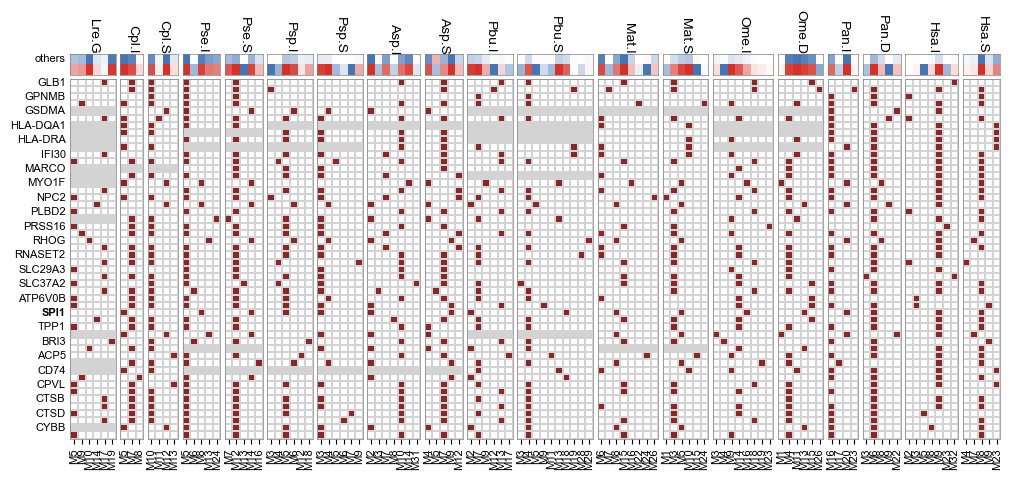

In [36]:
order = ['Lre.G','Cpl.I','Cpl.S','Pse.I','Pse.S','Psp.I','Psp.S','Asp.I','Asp.S','Pbu.I','Pbu.S','Mat.I','Mat.S','Ome.I','Ome.D','Pan.I','Pan.D','Hsa.I','Hsa.S']
# Immune
target_gene=[
 #Myeloid
 'GLB1',
 'GNPDA1',
 'GPNMB',
 'GRN',
 'GSDMA',
 'HEXB',
 'HLA-DQA1',
 'HLA-DQB1',
 'HLA-DRA',
 'HLA-DRB1',
 'IFI30',
 'LGMN',
 'MARCO',
 'MPEG1',
 'MYO1F',
 'NAGA',
 'NPC2',
 'PGD',
 'PLBD2',
 'PLXNC1',
 'PRSS16',
 'PSAP',
 'RHOG',
 'ASAH1',
 'RNASET2',
 'SCPEP1',
 'SLC29A3',
 'SLC35F6',
 'SLC37A2',
 'SLC40A1',
 'ATP6V0B',
 'ATP6V0C',
 'SPI1',
 'ATP6V1B2',
 'TPP1',
 'VSIR',
 'BRI3',
 'C5AR1',
 'ACP5',
 'CD300E',
 'CD74',
 'CMKLR1',
 'CPVL',
 'CTSA',
 'CTSB',
 'CTSC',
 'CTSD',
 'CTSZ',
 'CYBB',
 'DNASE2'

]
celltype_mapper = {
    'Myeloid':'Myeloid',
}

DrawHeatMap(order,target_gene,celltype_mapper,
            h_counts=[1,17],
            figuresize=(12,5),
            save='Myeloid_heatmap_0929.pdf'
            )

(12, 6)
['others', 'T']
1
           M4  M10  M11  M15  M20
ETS1      1.0  0.0  0.0  0.0  0.0
FGD3     -1.0 -1.0 -1.0 -1.0 -1.0
FNBP1     0.0  0.0  0.0  0.0  1.0
FYN       1.0  0.0  0.0  0.0  0.0
GMIP      0.0  0.0  1.0  0.0  0.0
GNG2      0.0  0.0  0.0  0.0  1.0
GRAP2    -1.0 -1.0 -1.0 -1.0 -1.0
IKZF1    -1.0 -1.0 -1.0 -1.0 -1.0
IKZF3     0.0  0.0  0.0  0.0  0.0
IL2RB    -1.0 -1.0 -1.0 -1.0 -1.0
IL2RG    -1.0 -1.0 -1.0 -1.0 -1.0
IL7R     -1.0 -1.0 -1.0 -1.0 -1.0
ITK      -1.0 -1.0 -1.0 -1.0 -1.0
JAK1     -1.0 -1.0 -1.0 -1.0 -1.0
JAK3     -1.0 -1.0 -1.0 -1.0 -1.0
LCK       0.0  0.0  0.0  0.0  0.0
P2RY10   -1.0 -1.0 -1.0 -1.0 -1.0
P2RY8     0.0  0.0  0.0  0.0  1.0
PIK3CD    0.0  0.0  0.0  0.0  1.0
PRKCH    -1.0 -1.0 -1.0 -1.0 -1.0
PTPRC     0.0  1.0  0.0  0.0  0.0
SASH3    -1.0 -1.0 -1.0 -1.0 -1.0
SKAP1    -1.0 -1.0 -1.0 -1.0 -1.0
SLA2     -1.0 -1.0 -1.0 -1.0 -1.0
ACAP1    -1.0 -1.0 -1.0 -1.0 -1.0
ST8SIA4   0.0  0.0  0.0  0.0  1.0
STAT4    -1.0 -1.0 -1.0 -1.0 -1.0
SYTL3    -1.0 -1.0 -1.

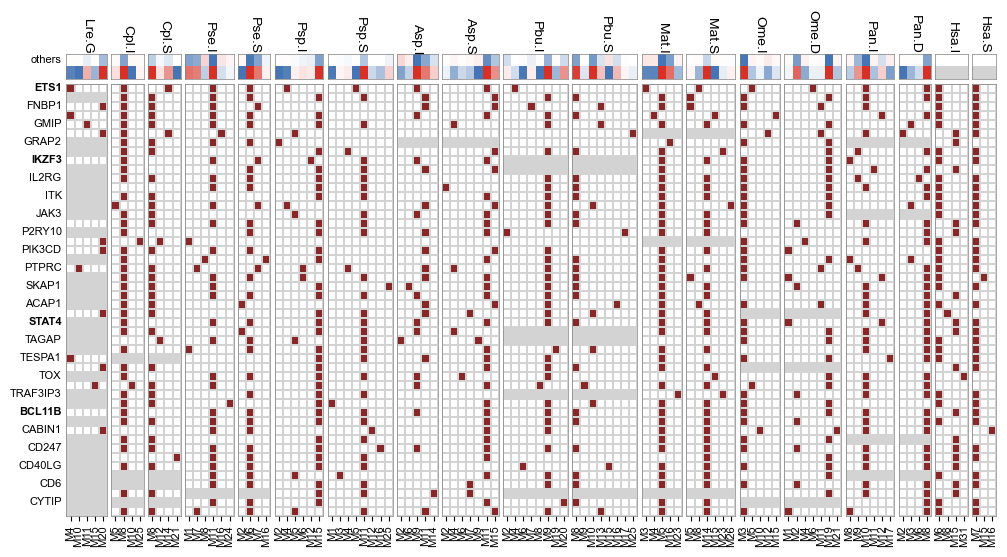

In [26]:
order = ['Lre.G','Cpl.I','Cpl.S','Pse.I','Pse.S','Psp.I','Psp.S','Asp.I','Asp.S','Pbu.I','Pbu.S','Mat.I','Mat.S','Ome.I','Ome.D','Pan.I','Pan.D','Hsa.I','Hsa.S']
target_gene=[
#T cell
'ETS1', 'FGD3', 'FNBP1', 'FYN', 'GMIP', 'GNG2', 'GRAP2', 'IKZF1', 'IKZF3', 'IL2RB', 'IL2RG', 'IL7R', 'ITK', 'JAK1', 'JAK3', 'LCK', 'P2RY10', 'P2RY8', 'PIK3CD', 'PRKCH', 'PTPRC', 'SASH3', 'SKAP1', 'SLA2', 'ACAP1', 'ST8SIA4', 'STAT4', 'SYTL3', 'TAGAP', 'TCF7', 'TESPA1', 'THEMIS', 'TOX', 'TOX2', 'TRAF3IP3', 'TXK', 'BCL11B', 'ZAP70', 'CABIN1', 'CD226', 'CD247', 'CD28', 'CD40LG', 'CD5', 'CD6', 'CD8A', 'CYTIP', 'DOCK10',
 #B cell
# 'FAU', 'RACK1', 'TPT1', 'UBA52', 'DDX21', 'EEF1G', 'EEF2', 'EIF3E', 'SPCS3', 'TNFRSF13B', 'TNFRSF17', 'EBF1', 'EEF1B2'
# 'HSP90B1', 'HYOU1', 'KRTCAP2', 'LMAN1', 'PAX5', 'PDIA4', 'PDIA6', 'POU2AF1', 'PRDX4', 'SPCS2', 'TNFRSF13B', 'TNFRSF17', 'TXNDC5', 'VPREB3', 'CRELD2', 'DENND5B', 'DNAJB11', 'EBF1'
]
celltype_mapper = {
    # 'B cells':'B',
    "T cells":'T',
    # 'B-like':'B',
    # 'B and B plasma':'B',
    'T-like':'T',
    'T and T plasma':'T',
}

DrawHeatMap(order,target_gene,celltype_mapper,
            h_counts=[1,17],
            figuresize=(12,6),
            save='T_cell_heatmap_1009.pdf'
            )

(12, 8)
['others', 'Mesenchymal']
1
           M2   M4   M6   M9  M10  M12  M16  M22
CDH11     1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
COL16A1  -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0
CPXM1     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
DCN       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
ANGPTL2   0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0
ANTXR1    0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0
MXRA8     0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0
PKD2      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
VASN      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
ZCCHC24  -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0
BMP4      0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0
C1QTNF2   0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0
PAMR1     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
PTGES     0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0
RSPO1    -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0
FRZB      0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0
COL1A1    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
COL1A2   -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0
COL5A1    0.0  0.0  0.0  0.0  0.0

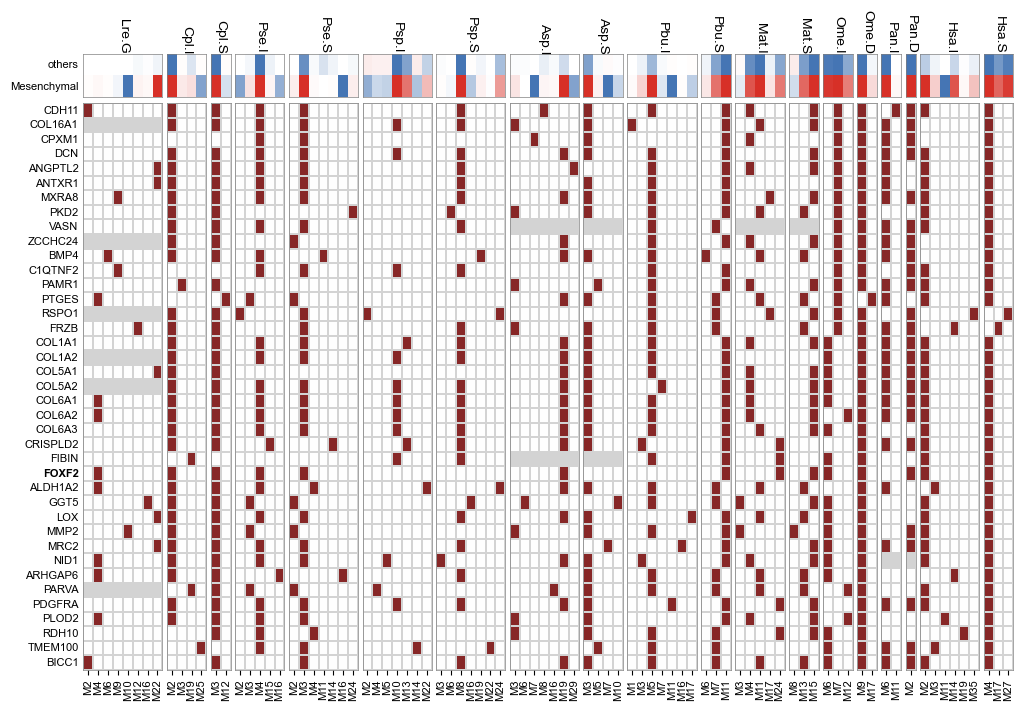

In [ ]:
#Mesenchymal
order = ['Lre.G','Cpl.I','Cpl.S','Pse.I','Pse.S','Psp.I','Psp.S','Asp.I','Asp.S','Pbu.I','Pbu.S','Mat.I','Mat.S','Ome.I','Ome.D','Pan.I','Pan.D','Hsa.I','Hsa.S']
target_gene = [
'CDH11', 
'COL16A1',
'CPXM1',
'DCN', 
'ANGPTL2', 
'ANTXR1', 
'MXRA8',
'PKD2', 
'VASN', 
'ZCCHC24', 
'BMP4', 
'C1QTNF2',
'PAMR1',
'PTGES',
'RSPO1',
'FRZB',
'COL1A1', 
'COL1A2', 
'COL5A1', 
'COL5A2', 
'COL6A1', 
'COL6A2', 
'COL6A3', 
'CRISPLD2', 
'FIBIN', 
'FOXF2', 
'ALDH1A2', 
'GGT5', 
'LOX', 
'MMP2', 
'MRC2', 
'NID1', 
'ARHGAP6', 
'PARVA', 
'PDGFRA', 
'PLOD2', 
'RDH10', 
'TMEM100', 
'BICC1', 

]
celltype_mapper = {
    'Mesenchymal':'Mesenchymal',
    'Smooth_muscle':'Mesenchymal',
    'Pericyte':'Mesenchymal',
    'Myofibroblast':'Mesenchymal',
    'Fibroblast':'Mesenchymal',
}

DrawHeatMap(order,target_gene,celltype_mapper,
            # h_counts=[1,12],
            figuresize=(12, 8),
            save = 'Mesenchymal_heatmap_0925.pdf',
            )

(9, 4)
['others', 'Endocrine']
1
           M2   M4   M6  M16
FEV      -1.0 -1.0 -1.0 -1.0
GCG       0.0  0.0  0.0  1.0
GFRA1     0.0  0.0  0.0  1.0
GNAO1     0.0  0.0  1.0  0.0
INSM1    -1.0 -1.0 -1.0 -1.0
ISL1      0.0  0.0  1.0  0.0
KCNJ9    -1.0 -1.0 -1.0 -1.0
ANKRD55   0.0  0.0  1.0  0.0
KCNK9     0.0  0.0  1.0  0.0
KCNMA1    0.0  0.0  1.0  0.0
KIF1A    -1.0 -1.0 -1.0 -1.0
AP3B2     0.0  1.0  0.0  0.0
MAP6      0.0  0.0  0.0  0.0
MAPK8IP1 -1.0 -1.0 -1.0 -1.0
NEUROD1   0.0  0.0  0.0  0.0
NRSN1     0.0  0.0  0.0  0.0
PAX6      0.0  0.0  1.0  0.0
PCSK1     0.0  0.0  1.0  0.0
PCSK2     0.0  0.0  1.0  0.0
PPP1R1C   0.0  0.0  1.0  0.0
RAB3C     0.0  0.0  1.0  0.0
RASD1     0.0  0.0  1.0  0.0
RET       0.0  0.0  0.0  0.0
RFX6      1.0  0.0  0.0  0.0
RUNDC3A  -1.0 -1.0 -1.0 -1.0
SCG2     -1.0 -1.0 -1.0 -1.0
SCG3     -1.0 -1.0 -1.0 -1.0
SCG5     -1.0 -1.0 -1.0 -1.0
SCGN      0.0  0.0  1.0  0.0
SCN3B     0.0  0.0  1.0  0.0
SHISAL1   0.0  0.0  0.0  1.0
SLC18A2   0.0  0.0  1.0  0.0
SLC29A4   

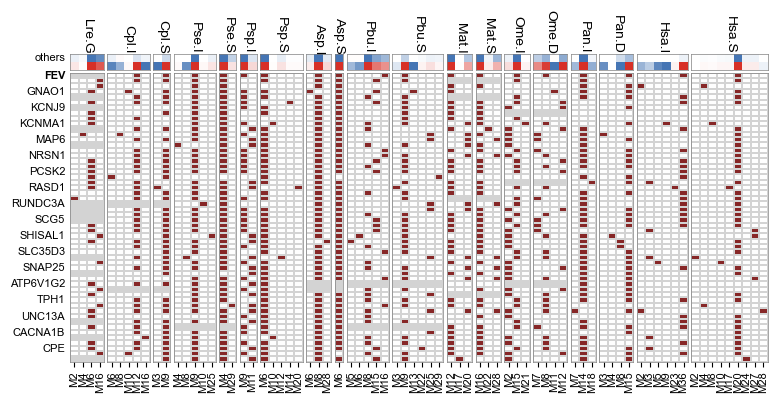

In [57]:
#Enteroendocrine
order = ['Lre.G','Cpl.I','Cpl.S','Pse.I','Pse.S','Psp.I','Psp.S','Asp.I','Asp.S','Pbu.I','Pbu.S','Mat.I','Mat.S','Ome.I','Ome.D','Pan.I','Pan.D','Hsa.I','Hsa.S']
target_gene = [
    # 基因1（主图版）
    # 'CHGA', 'CPE', 'CPLX2', 'GCG', 'GFRA1', 'KCNMA1', 'PAX6', 'PCSK1', 'RAB3C', 'SCGN', 'SMPD3', 'SYT4', 'UCHL1', 'VWA5B2'
    # 基因2（附图版）
    # 'CHGA', 'CHGB', 'CPE', 'CPLX2', 'DDC', 'DNER', 'FEV', 'GCG', 'GFRA1', 'GNAO1', 'INSM1', 'KCNJ9', 'KCNMA1', 'KIF1A', 'AP3B2', 'MAP6', 'MAPK8IP1', 'ARF3', 'NEUROD1', 'NRSN1',
    # 'PAX6', 'PCSK1', 'RAB3C', 'RET', 'RFX6', 'RUNDC3A', 'SCG2', 'SCG3', 'SCG5', 'SCGN', 'SLC18A2', 'SLC29A4', 'SLC35D3', 'SLC35G2', 'ATP6V1G2', 'SMPD3', 'SNAP25', 'SOGA3', 'SV2B',
    # 'SYP', 'SYT11', 'SYT4', 'TMEM63C', 'TPH1', 'UCHL1', 'VGF', 'VWA5B2', 'C2CD4C', 'CACNA1B', 'CACNA2D1'

    'FEV', 'GCG', 'GFRA1', 'GNAO1', 'INSM1', 'ISL1', 'KCNJ9', 'ANKRD55', 'KCNK9', 'KCNMA1', 'KIF1A', 'AP3B2', 'MAP6', 'MAPK8IP1', 'NEUROD1', 'NRSN1', 'PAX6', 'PCSK1', 'PCSK2', 'PPP1R1C', 'RAB3C', 'RASD1', 'RET', 'RFX6', 'RUNDC3A', 'SCG2', 'SCG3', 'SCG5', 'SCGN', 'SCN3B', 'SHISAL1', 'SLC18A2', 'SLC29A4', 'SLC35D3', 'SLC35G2', 'SMPD3', 'SNAP25', 'SOGA3', 'SV2B', 'ATP6V1G2', 'SYT11', 'SYT4', 'TPH1', 'TRPA1', 'UCHL1', 'UNC13A', 'VGF', 'VWA5B2', 'CACNA1B', 'CACNA2D1', 'CHGA', 'CPE', 'CPLX2', 'DNER'
]
celltype_mapper = {
  
    'Enteroendocrine':'Endocrine',
}
DrawHeatMap(order,target_gene,celltype_mapper,
            # h_counts=[1,8],
            figuresize=(9, 4),
            save = 'Enteroendocrine_heatmap_0924.pdf',
            )
# DrawHeatMap(order,target_gene,celltype_mapper,
#             h_counts=[1,15],
#             figuresize=(12, 7),
#             save = 'Enteroendocrine_heatmap_0923_moregene.pdf',
#             )


(12, 7)
['others', 'Endothelial']
1
          M2   M3   M4   M5   M9  M10  M15  M16  M19  M20  M21  M22
EVA1C    0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
EXOC3L1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
EXOC3L2 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0
AKAP12   0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
FAM167B -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0
...      ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...
ENG      0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
EPAS1    0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0
EPHB4   -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0
ERG      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
ESAM    -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0

[135 rows x 12 columns]
Index(['M2', 'M3', 'M4', 'M5', 'M9', 'M10', 'M15', 'M16', 'M19', 'M20', 'M21',
       'M22'],
      dtype='object')
2
Lre.G

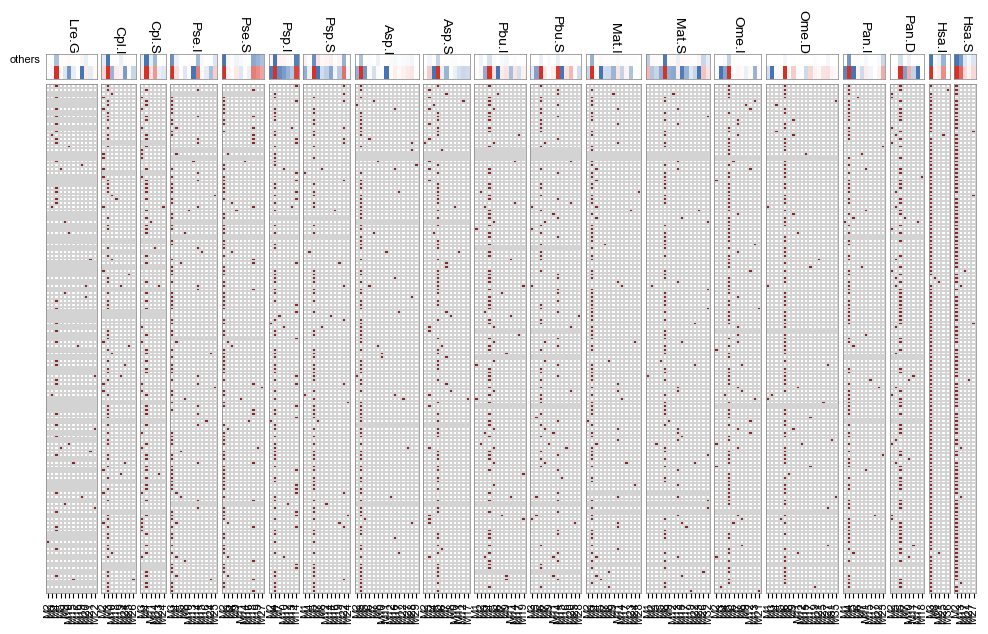

In [29]:
#Endothelial
order = ['Lre.G','Cpl.I','Cpl.S','Pse.I','Pse.S','Psp.I','Psp.S','Asp.I','Asp.S','Pbu.I','Pbu.S','Mat.I','Mat.S','Ome.I','Ome.D','Pan.I','Pan.D','Hsa.I','Hsa.S']
target_gene = [
'EVA1C',
 'EXOC3L1',
 'EXOC3L2',
 'AKAP12',
 'FAM167B',
 'FAM43A',
 'FERMT2',
 'FGD5',
 'FLT1',
 'FLT4',
 'FZD4',
 'GJA1',
 'GPR182',
 'GRB10',
 'HEG1',
 'HSPA12B',
 'HYAL2',
 'ANGPT2',
 'IFITM1',
 'IFITM2',
 'IL6ST',
 'ITGA5',
 'ITGB1',
 'JAG2',
 'JAM2',
 'JCAD',
 'KANK3',
 'KDR',
 'KIAA0355',
 'KLHL4',
 'LDB2',
 'LIFR',
 'LIMCH1',
 'LMO2',
 'LRRC32',
 'MMRN2',
 'MPZL2',
 'MYCT1',
 'ABLIM3',
 'ARAP3',
 'NOTCH4',
 'NOVA2',
 'NPR1',
 'ARHGAP31',
 'OSMR',
 'PCDH12',
 'PDE2A',
 'PDGFB',
 'PEA15',
 'PEAR1',
 'PECAM1',
 'PLEKHG1',
 'PLK2',
 'PLS3',
 'PLVAP',
 'PLXND1',
 'PREX2',
 'PTPRB',
 'PTPRM',
 'RAMP2',
 'RAMP3',
 'RAPGEF3',
 'RASIP1',
 'RASSF9',
 'RBMS2',
 'RHOJ',
 'ASAP1',
 'ROBO4',
 'ATOH8',
 'RUNX1T1',
 'S1PR1',
 'SASH1',
 'SCARF1',
 'SEMA4C',
 'SHANK3',
 'SHE',
 'SHROOM4',
 'SLCO2A1',
 'SMAD1',
 'SMAD6',
 'SNTB2',
 'SOCS3',
 'SPTBN1',
 'STARD8',
 'TEAD4',
 'TEK',
 'THSD1',
 'TIE1',
 'TINAGL1',
 'TM4SF1',
 'TMEM204',
 'TMEM88',
 'TNS2',
 'TSPAN18',
 'TSPAN9',
 'VAT1',
 'VGLL4',
 'BCL6B',
 'VWF',
 'ZNF521',
 'BMPR2',
 'CALCRL',
 'CAV1',
 'CAV2',
 'CAVIN2',
 'CCDC85B',
 'ACVRL1',
 'CCM2L',
 'CD93',
 'ADAM15',
 'CDH5',
 'ADCY4',
 'CLDN5',
 'CLEC14A',
 'CLIC2',
 'CNN3',
 'COL15A1',
 'CRIM1',
 'CRIP2',
 'ADGRL4',
 'CTTNBP2NL',
 'CYYR1',
 'AFAP1L1',
 'DLC1',
 'DLL4',
 'DPYSL3',
 'DYSF',
 'ECSCR',
 'EGFL7',
 'ELK3',
 'ENG',
 'EPAS1',
 'EPHB4',
 'ERG',
 'ESAM'
]
celltype_mapper = {
    'Endothelial':'Endothelial',
    'Lymphatic_endothelia':'Endothelial',
    'Vascular_endothelia':'Endothelial',
}

DrawHeatMap_2(order,target_gene,celltype_mapper,
            h_counts=[1,20],
            figuresize=(12, 7),
            save = 'Endothelial_heatmap_0925.pdf',
            )

(10, 8)
['others', 'T']
1
          M1   M4   M5  M10  M20  M21
ETS1     0.0  1.0  0.0  0.0  0.0  0.0
GATA3    1.0  0.0  0.0  0.0  0.0  0.0
IKZF1   -1.0 -1.0 -1.0 -1.0 -1.0 -1.0
IKZF2    0.0  0.0  0.0  0.0  1.0  0.0
IKZF3    0.0  0.0  0.0  0.0  0.0  0.0
REL      0.0  0.0  0.0  0.0  0.0  1.0
SATB1    0.0  0.0  0.0  0.0  0.0  0.0
SETBP1   0.0  0.0  0.0  0.0  1.0  0.0
STAT4   -1.0 -1.0 -1.0 -1.0 -1.0 -1.0
TCF7    -1.0 -1.0 -1.0 -1.0 -1.0 -1.0
BCL11B   0.0  0.0  0.0  0.0  0.0  0.0
AGAP2   -1.0 -1.0 -1.0 -1.0 -1.0 -1.0
ELF1     0.0  0.0  0.0  0.0  0.0  0.0
ARHGDIB  0.0  0.0  0.0  0.0  0.0  0.0
CD2     -1.0 -1.0 -1.0 -1.0 -1.0 -1.0
CD7     -1.0 -1.0 -1.0 -1.0 -1.0 -1.0
CELF2    0.0  0.0  0.0  0.0  0.0  0.0
CMTM3   -1.0 -1.0 -1.0 -1.0 -1.0 -1.0
CORO1A  -1.0 -1.0 -1.0 -1.0 -1.0 -1.0
CXCR3    0.0  0.0  0.0  1.0  0.0  0.0
CXCR6   -1.0 -1.0 -1.0 -1.0 -1.0 -1.0
DOCK8   -1.0 -1.0 -1.0 -1.0 -1.0 -1.0
ESYT1   -1.0 -1.0 -1.0 -1.0 -1.0 -1.0
EVL     -1.0 -1.0 -1.0 -1.0 -1.0 -1.0
GPR174  -1.0 -1.0 -1.0 -

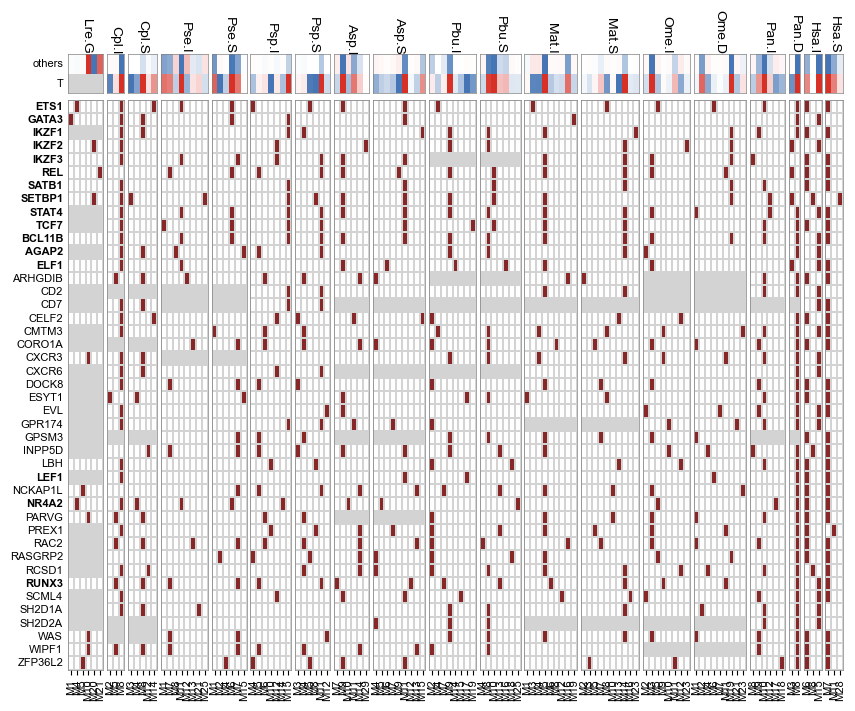

In [42]:
#T cells 
order = ['Lre.G','Cpl.I','Cpl.S','Pse.I','Pse.S','Psp.I','Psp.S','Asp.I','Asp.S','Pbu.I','Pbu.S','Mat.I','Mat.S','Ome.I','Ome.D','Pan.I','Pan.D','Hsa.I','Hsa.S']
target_gene=[
#9.22 可使用基因
#保守基因
# 'FGD3', 'FNBP1', 'FYN', 'IKZF1', 'IL7R', 'ITK', 'PIK3CD', 'SKAP1', 'TESPA1', 'ZAP70', 'DOCK10','LCK', 'SLA2', 'STAT4', 'BCL11B', 'CD247', 'CD40LG', 'CD6',
#保守基因TF
# 'IKZF1','STAT4','BCL11B',
# 'ALOX5AP','PBXIP1','ARHGDIB',  'CNN2',  'CXCR4',  'CYTH1',  'FXYD5',  'GNAI2',  'IPCEF1',  'LBH',  'MALT1',    'PKN1',  'S1PR4'
#9.24 重新筛选
# 2保守
 'ETS1', 'GATA3', 'IKZF1', 'IKZF2', 'IKZF3', 'REL', 'SATB1', 'SETBP1', 'STAT4', 'TCF7', 'BCL11B', 'AGAP2', 'ELF1',
# 2特异
 'ARHGDIB', 'CD2', 'CD7', 'CELF2', 'CMTM3', 'CORO1A', 'CXCR3', 'CXCR6', 'DOCK8', 'ESYT1', 'EVL', 'GPR174', 'GPSM3', 'INPP5D', 'LBH', 'LEF1', 'NCKAP1L', 'NR4A2', 'PARVG', 'PREX1', 'RAC2', 'RASGRP2', 'RCSD1', 'RUNX3', 'SCML4', 'SH2D1A', 'SH2D2A', 'WAS', 'WIPF1', 'ZFP36L2'
 ]

celltype_mapper = {
    'T cells':'T',
    'T and NK cells':'T'
}

DrawHeatMap(order,target_gene,celltype_mapper,
            # h_counts=[1,7],
            figuresize=(10,8)
            # ,save='T_different_heatmap_0924.pdf'
            )

(6, 3)
['others', 'Ciliated']
1
           M2  M14
PCM1      1.0  0.0
AK7       1.0  0.0
NME7      1.0  0.0
CCDC113   1.0  0.0
DNAI1     1.0  0.0
MOK       1.0  0.0
CCDC39    1.0  0.0
RSPH3     1.0  0.0
TRAF3IP1  1.0  0.0
CCDC173   1.0  0.0
MDM1      1.0  0.0
ARMC3     0.0  1.0
MAP9      1.0  0.0
GAS8      1.0  0.0
IQCA1     1.0  0.0
Index(['M2', 'M14'], dtype='object')
2
Lre.G
               M2       M14
tmp.celltype               
others       -1.0 -0.019290
Ciliated      1.0  0.000097
1
           M5   M8  M12
PCM1      0.0  1.0  0.0
AK7       0.0  0.0  0.0
NME7      0.0  0.0  0.0
CCDC113   0.0  0.0  1.0
DNAI1     0.0  0.0  0.0
MOK       0.0  0.0  0.0
CCDC39    0.0  0.0  0.0
RSPH3     0.0  0.0  0.0
TRAF3IP1  0.0  0.0  0.0
CCDC173   0.0  0.0  1.0
MDM1      0.0  0.0  0.0
ARMC3     1.0  0.0  0.0
MAP9      0.0  1.0  0.0
GAS8      0.0  0.0  0.0
IQCA1     0.0  0.0  0.0
Index(['M5', 'M8', 'M12'], dtype='object')
2
Cpl.I
                    M5   M8       M12
tmp.celltype                    

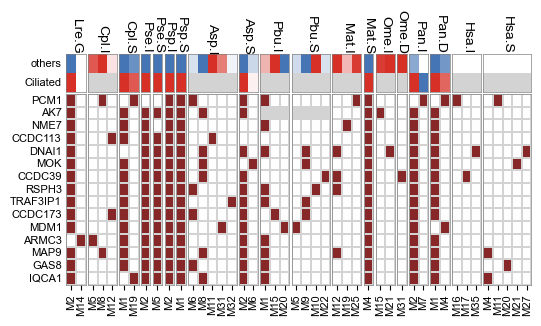

In [21]:
#Ciliated 
order = ['Lre.G','Cpl.I','Cpl.S','Pse.I','Pse.S','Psp.I','Psp.S','Asp.I','Asp.S','Pbu.I','Pbu.S','Mat.I','Mat.S','Ome.I','Ome.D','Pan.I','Pan.D','Hsa.I','Hsa.S']
target_gene=[
    	# 'AK7', 'CCDC173', 'MDM1', 'MAP9', 'MEIG1', 'MOK', 'CCDC39', 'GAS8', 'TRAF3IP1', 'IQCA1',
        # 'PCM1', 'AK7', 'NME7', 'CCDC113', 'DNAI1', 'MOK', 'CCDC39', 'RSPH3', 'TRAF3IP1', 'CCDC173', 'MDM1', 'ARMC3', 'MEIG1', 'MAP9', 'GAS8', 'IQCA1',
        'PCM1', 'AK7', 'NME7', 'CCDC113', 'DNAI1', 'MOK', 'CCDC39', 'RSPH3', 'TRAF3IP1', 'CCDC173', 'MDM1', 'ARMC3', 'MAP9', 'GAS8', 'IQCA1',
 ]
celltype_mapper = {
    'Ciliated':'Ciliated'
}

DrawHeatMap(order,target_gene,celltype_mapper,
            figuresize=(6, 3),
            save='Ciliated_heatmap_0925.pdf'
            )

(36, 32)
['Oxynticopeptic', 'Chief', 'Parietal', 'others']
1
          M1   M2   M3   M4   M5   M6   M7   M8   M9  M10  M11  M13  M14  M15  \
PGA3    -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0   
RPL9     1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
SLC38A2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
GNG5    -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0   
RPS18    1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
...      ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
MPP1     0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
UQCRB    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
NDFIP1   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
CHIA    -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0   
MDH1     0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0 

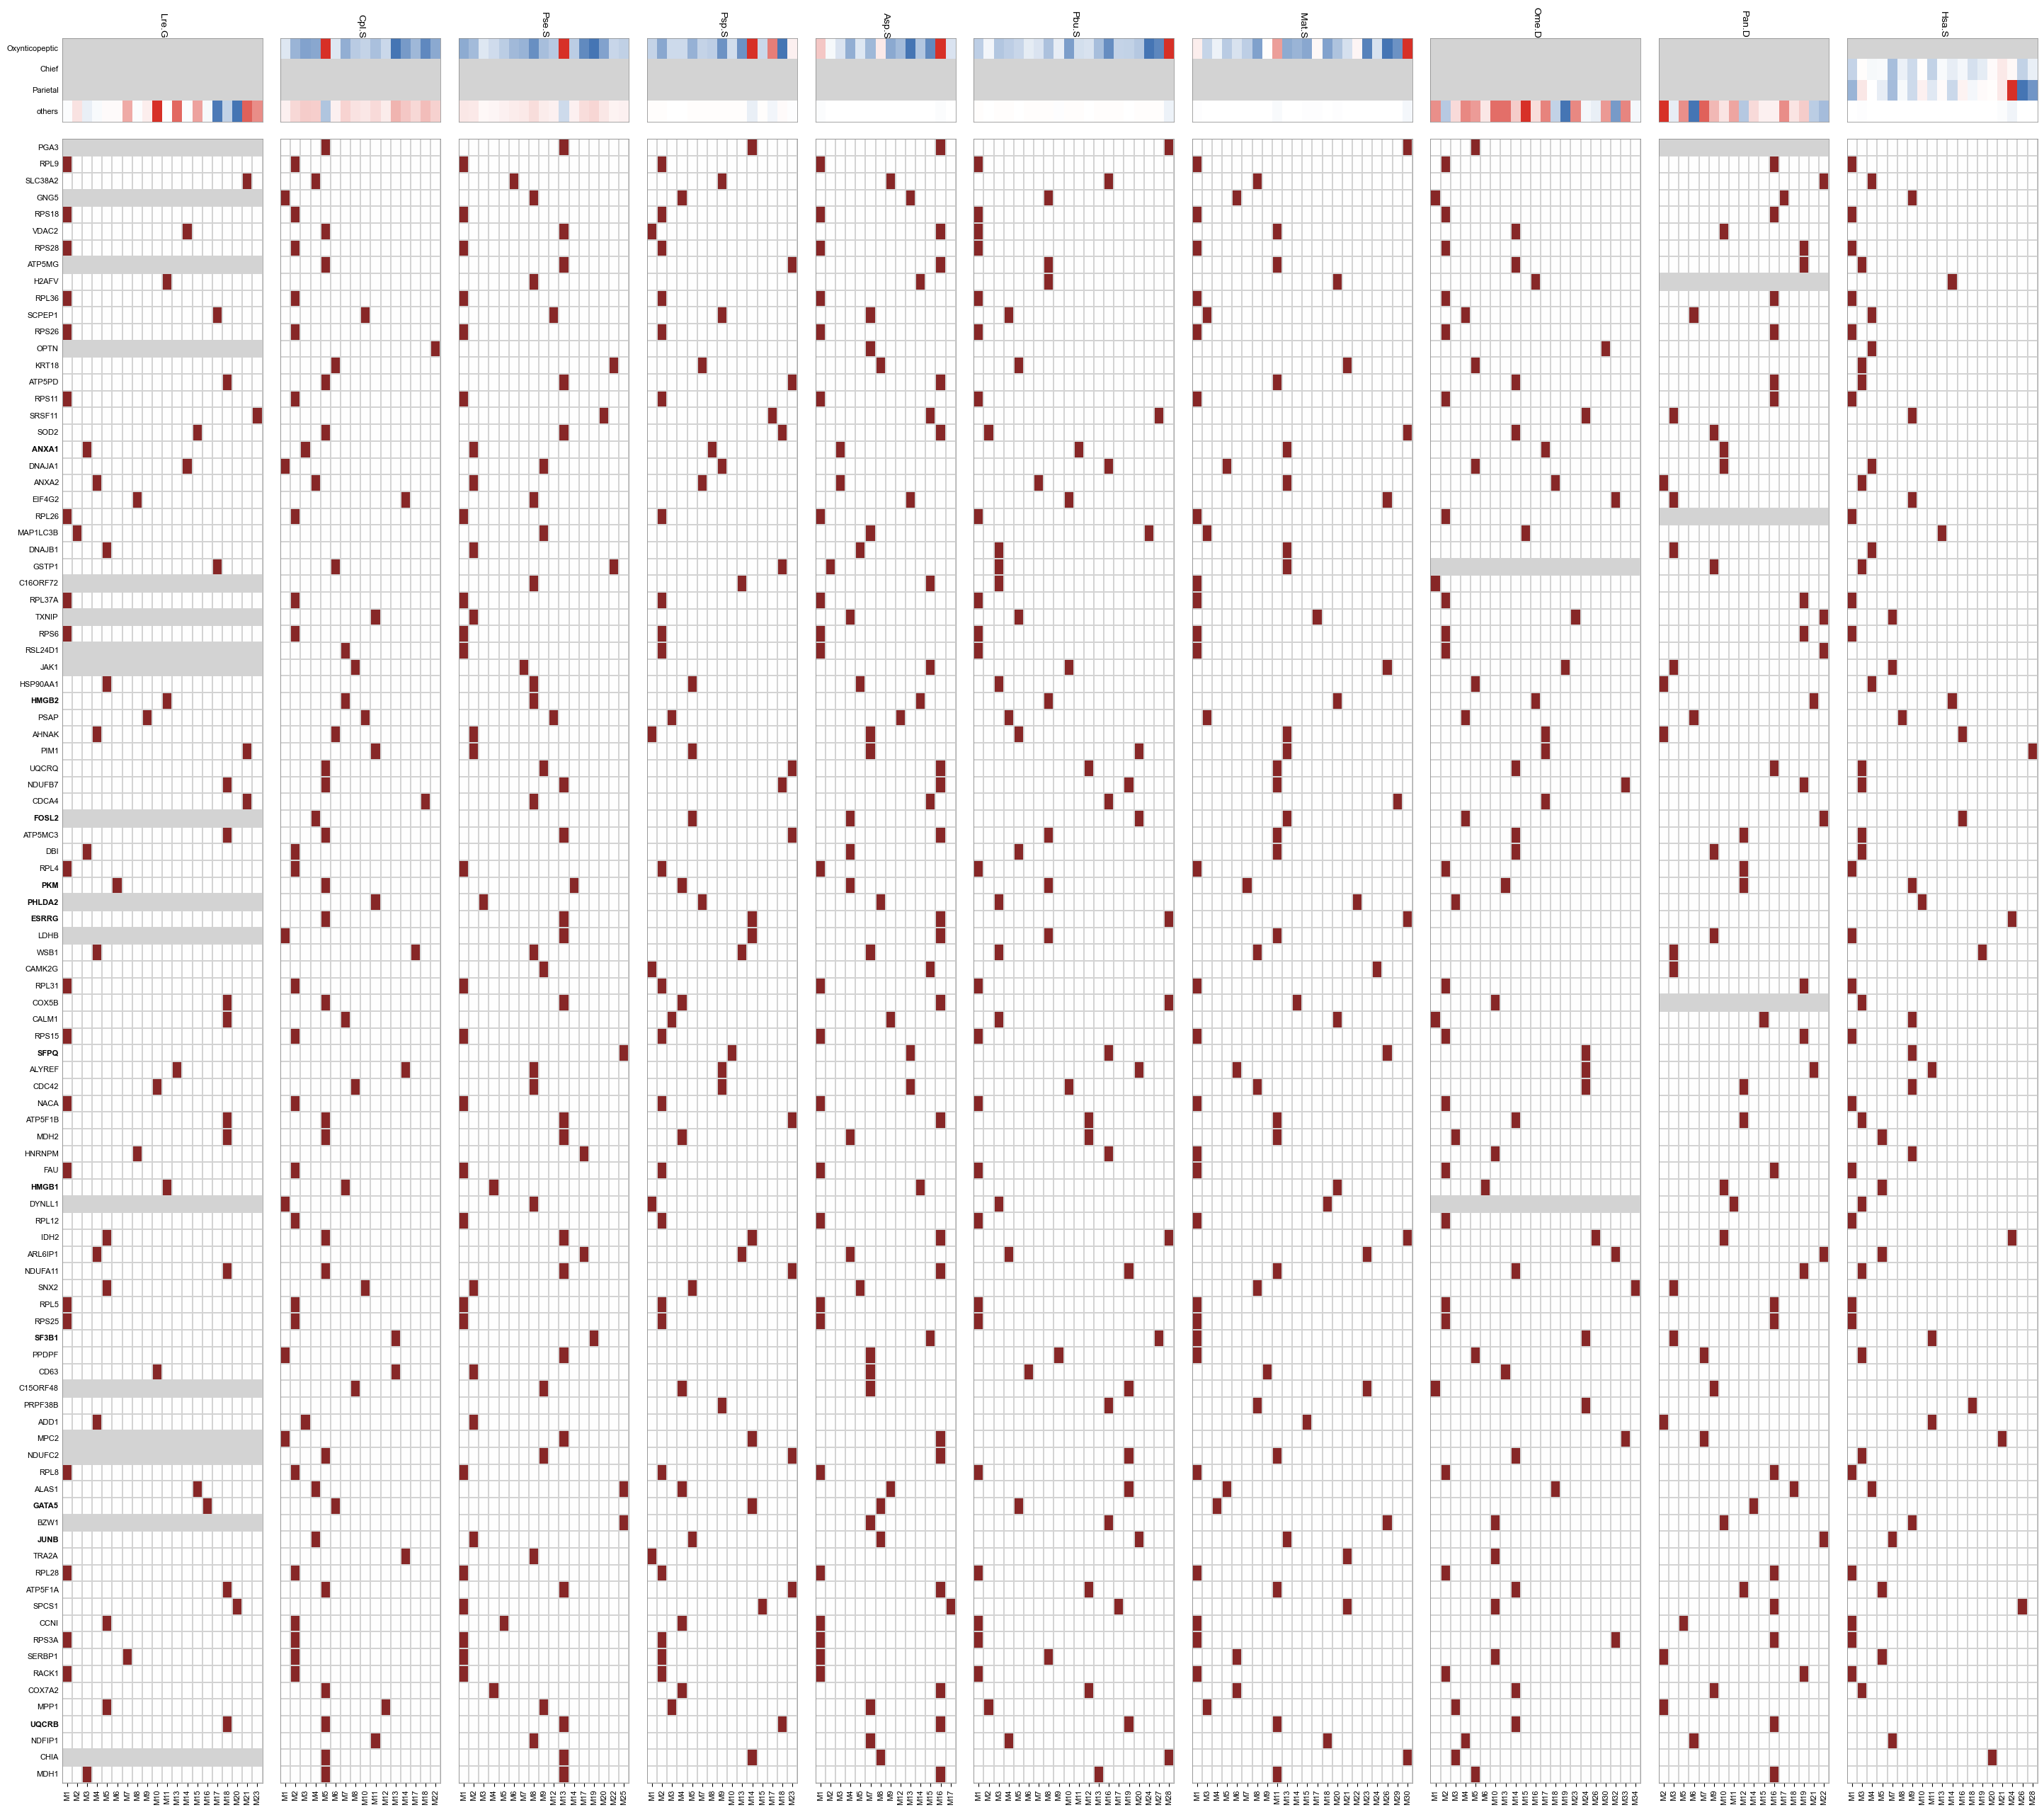

In [ ]:
#Oxynticopeptic recruiment(祖先溯源版)-部分基因版本
order = ['Lre.G','Cpl.S','Pse.S','Psp.S','Asp.S','Pbu.S','Mat.S','Ome.D','Pan.D','Hsa.S' ]
target_gene=[
    # 'ACSS1', 'ALDH4A1', 'BCKDHB', 'ERMP1', 'FABP3', 'KCNQ1', 'LRIG1', 'MFSD4A', 'NDUFA5', 'PPARGC1A', 'RAP1GAP', 'REXO2', 'SLC16A7', 'SLC26A9', 'SLC2A12', 'SLC4A2', 'TPD52L1', 'TRIM50', 'VLDLR',
# #P
# 'PPARGC1A', 'ESRRG', 'GOT1', 'NNT',
# #chief
#  'CREB3L4',
#  'ETV5',
#  'ID1',
#  'NFIX',
#  'SMAD1',
#  'SOX2',
#  'SOX9',
#  'SPDEF',
#  'SPR',
#  'ZNF503'
 ]
celltype_mapper = {
    'Parietal':'Parietal',
    'Chief':'Chief',
    'Oxynticopeptic':'Oxynticopeptic',
    # 'Oxynticopeptic-like':'Oxynticopeptic',
    
}

DrawHeatMap(order,target_gene,celltype_mapper,
            # h_counts=[1,7],
            # figuresize=(9, 3),
            # save='Oxynticopeptic_recruiment_heatmap_onlyTF_0923.pdf'
            )

(12, 8)
['others', 'Chief', 'Oxynticopeptic', 'Parietal']
1
           M1   M2   M3   M4   M6   M8  M15  M17  M18  M20  M22
ARFIP2    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
ARHGAP8   0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0
CA8       0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
COA3     -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0
CRLS1     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
EPHB3    -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0
GSTM3    -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0
HOMER2    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
ID1      -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0
KIAA1324  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
MAGI1     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
MPZL1     0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
NFIX     -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0
NUDT8     0.0  0.0  0.0  0.0  0.0  0.0  0.0 

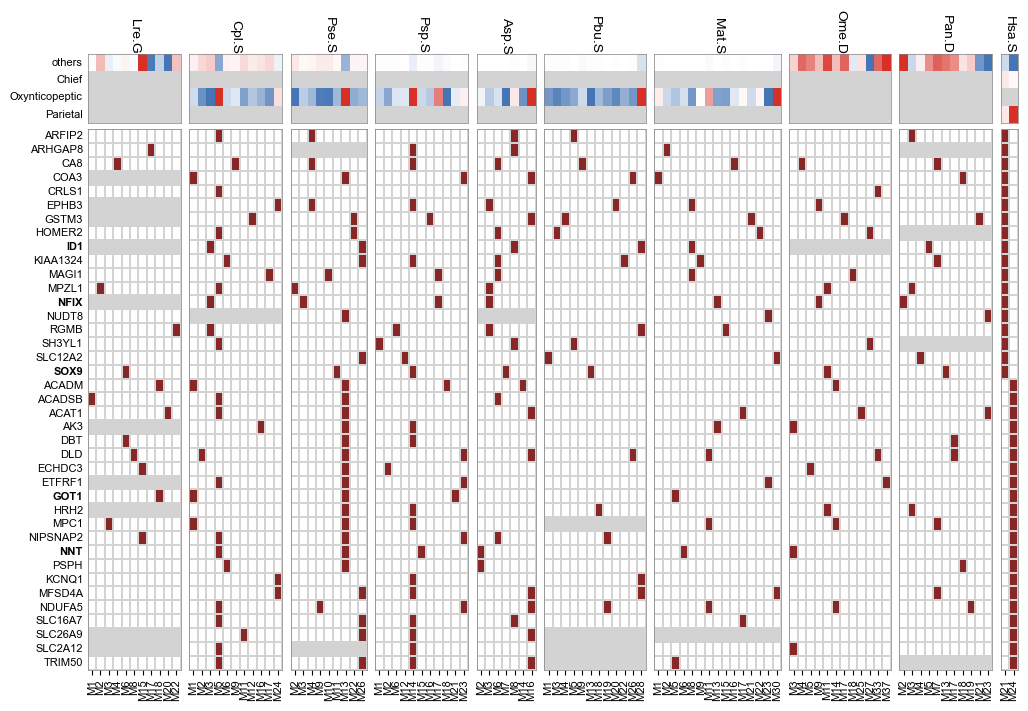

In [52]:
#Oxynticopeptic recruiment(祖先溯源版)
order = ['Lre.G','Cpl.S','Pse.S','Psp.S','Asp.S','Pbu.S','Mat.S','Ome.D','Pan.D','Hsa.S' ]
target_gene=[
 'ARFIP2', 'ARHGAP8', 'CA8', 'COA3', 'CRLS1', 'EPHB3', 'GSTM3', 'HOMER2', 'ID1', 'KIAA1324', 'MAGI1', 'MPZL1', 'NFIX', 'NUDT8', 'RGMB', 'SH3YL1', 'SLC12A2', 'SOX9',
 'ACADM', 'ACADSB', 'ACAT1', 'AK3', 'DBT', 'DLD', 'ECHDC3', 'ETFRF1', 'GOT1', 'HRH2', 'MPC1', 'NIPSNAP2', 'NNT', 'PSPH',
 'KCNQ1', 'MFSD4A', 'NDUFA5', 'SLC16A7', 'SLC26A9', 'SLC2A12', 'TRIM50'
 ]
celltype_mapper = {
    'Parietal':'Parietal',
    'Chief':'Chief',
    'Oxynticopeptic':'Oxynticopeptic',
    # 'Oxynticopeptic-like':'Oxynticopeptic',
    
}

DrawHeatMap(order,target_gene,celltype_mapper,
            # h_counts=[1,17],
            figuresize=(12, 8),
            save='Oxynticopeptic_recruiment_heatmap_0924.pdf'
            )

(9, 5)
['others', 'Chief', 'Oxynticopeptic', 'Parietal']
1
           M1   M3   M4   M5  M15
ALDH6A1   0.0  0.0  0.0  0.0  1.0
GCAT      0.0  0.0  0.0  0.0  0.0
GLUL      0.0  0.0  0.0  1.0  0.0
LYZ       0.0  0.0  0.0  1.0  0.0
MPC2     -1.0 -1.0 -1.0 -1.0 -1.0
PGC      -1.0 -1.0 -1.0 -1.0 -1.0
PPP1R1B   0.0  0.0  1.0  0.0  0.0
TCEA3     1.0  0.0  0.0  0.0  0.0
COQ8A     0.0  0.0  0.0  0.0  0.0
EIF4EBP3  1.0  0.0  0.0  0.0  0.0
HIBADH    0.0  0.0  0.0  0.0  0.0
IDH2      0.0  0.0  0.0  1.0  0.0
ATP4A    -1.0 -1.0 -1.0 -1.0 -1.0
ATP4B    -1.0 -1.0 -1.0 -1.0 -1.0
CKB       0.0  1.0  0.0  0.0  0.0
ESRRG     0.0  0.0  0.0  0.0  0.0
Index(['M1', 'M3', 'M4', 'M5', 'M15'], dtype='object')
2
Lre.G
                      M1   M3       M4       M5  M15
tmp.celltype                                        
others         -0.193079 -1.0 -0.35997  0.04861  1.0
Chief          -2.000000 -2.0 -2.00000 -2.00000 -2.0
Oxynticopeptic -2.000000 -2.0 -2.00000 -2.00000 -2.0
Parietal       -2.000000 -2.0 -2.00

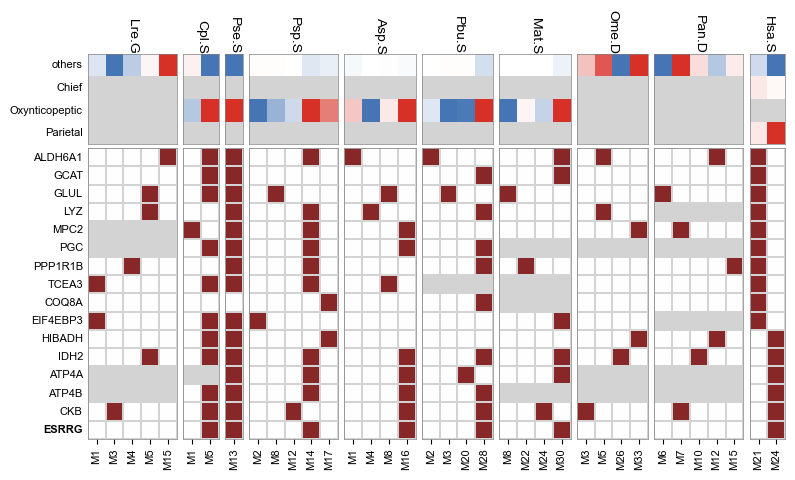

In [54]:
#Oxynticopeptic disperse（祖先溯源重建分析）
order = ['Lre.G','Cpl.S','Pse.S','Psp.S','Asp.S','Pbu.S','Mat.S','Ome.D','Pan.D','Hsa.S' ]
target_gene=[

 'ALDH6A1',
 'GCAT',
 'GLUL',
 'LYZ',
 'MPC2',
 'PGC',
 'PPP1R1B',
 'TCEA3',
 'COQ8A',
 'EIF4EBP3',

 'HIBADH',
 'IDH2',
 'ATP4A',
 'ATP4B',
 'CKB',
 'ESRRG'
]
celltype_mapper = {
    'Parietal':'Parietal',
    'Chief':'Chief',
    'Oxynticopeptic':'Oxynticopeptic',
    # 'Oxynticopeptic-like':'Oxynticopeptic',
}

DrawHeatMap(order,target_gene,celltype_mapper,
            figuresize=(9, 5),
            save='Oxynticopeptic_disperse_heatmap_0924.pdf'
            )

(6, 3)
['others', 'BEST4+']
1
           M2  M14  M16
PDE3A     0.0  0.0  0.0
ARHGEF16 -1.0 -1.0 -1.0
FTCD      0.0  0.0  1.0
PKP2     -1.0 -1.0 -1.0
PTPRH     1.0  0.0  0.0
RASSF6   -1.0 -1.0 -1.0
SGK2     -1.0 -1.0 -1.0
SPIC     -1.0 -1.0 -1.0
FAM3D    -1.0 -1.0 -1.0
PBX3      0.0  0.0  0.0
BEST4     0.0  0.0  0.0
CFTR      0.0  0.0  0.0
CLCN1    -1.0 -1.0 -1.0
DHCR24    0.0  1.0  0.0
Index(['M2', 'M14', 'M16'], dtype='object')
2
Lre.G
               M2       M14  M16
tmp.celltype                    
others        1.0 -0.384418 -1.0
BEST4+       -2.0 -2.000000 -2.0
1
           M8  M10  M11  M16
PDE3A     0.0  0.0  0.0  1.0
ARHGEF16  0.0  0.0  0.0  0.0
FTCD      0.0  0.0  0.0  0.0
PKP2      0.0  0.0  0.0  0.0
PTPRH     0.0  0.0  1.0  0.0
RASSF6    0.0  1.0  0.0  0.0
SGK2      0.0  0.0  0.0  0.0
SPIC      0.0  0.0  0.0  0.0
FAM3D    -1.0 -1.0 -1.0 -1.0
PBX3      1.0  0.0  0.0  0.0
BEST4     0.0  0.0  0.0  0.0
CFTR      0.0  0.0  0.0  0.0
CLCN1     0.0  0.0  0.0  0.0
DHCR24    0.0  1.0

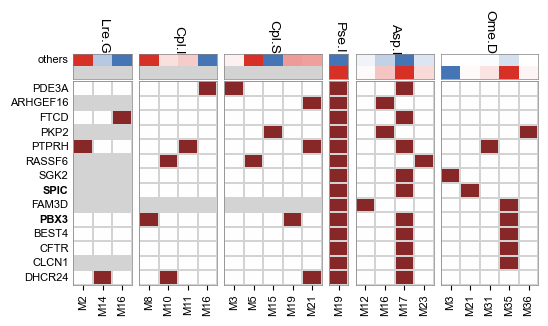

In [35]:
#best4
order = ['Lre.G','Cpl.I','Cpl.S','Ome.I','Ome.D','Pse.I','Asp.I']#BEST4
order = ['Lre.G','Cpl.I','Cpl.S','Pse.I','Asp.I','Ome.D']
target_gene=[
 
 'PDE3A',
 'ARHGEF16',
 'FTCD',
 'PKP2',
 'PTPRH',
 'RASSF6',
 'SGK2',
 'SPIC',
 'FAM3D',
 'PBX3',
 'BEST4',
 'CFTR',
 'CLCN1',
 'DHCR24'
 ]
celltype_mapper = {
    'BEST4+':'BEST4+',
    'BEST4-like':'BEST4+',
    
}

DrawHeatMap(order,target_gene,celltype_mapper,
            h_counts=[1,8],
            figuresize=(6, 3),
            save='BEST4_heatmap_0929.pdf'
            )

(8, 5)
['others', 'Tuft']
1
           M2   M3  M20
ALOX15B  -1.0 -1.0 -1.0
HMX3      0.0  0.0  0.0
KLHDC7A  -1.0 -1.0 -1.0
LMF1      0.0  0.0  0.0
PLEKHG3   1.0  0.0  0.0
SMPX     -1.0 -1.0 -1.0
AVIL      0.0  1.0  0.0
BANK1    -1.0 -1.0 -1.0
LTC4S     0.0  0.0  1.0
POU2F3   -1.0 -1.0 -1.0
CCDC129  -1.0 -1.0 -1.0
BAIAP3    0.0  0.0  0.0
TRIM36    0.0  0.0  0.0
C11ORF53 -1.0 -1.0 -1.0
Index(['M2', 'M3', 'M20'], dtype='object')
2
Lre.G
               M2       M3  M20
tmp.celltype                   
others        1.0 -0.11553 -1.0
Tuft         -2.0 -2.00000 -2.0
1
          M11  M25
ALOX15B   0.0  0.0
HMX3     -1.0 -1.0
KLHDC7A   0.0  0.0
LMF1      0.0  0.0
PLEKHG3   0.0  0.0
SMPX      0.0  0.0
AVIL     -1.0 -1.0
BANK1     0.0  1.0
LTC4S     1.0  0.0
POU2F3    1.0  0.0
CCDC129   1.0  0.0
BAIAP3    1.0  0.0
TRIM36    1.0  0.0
C11ORF53  1.0  0.0
Index(['M11', 'M25'], dtype='object')
2
Cpl.I
              M11       M25
tmp.celltype               
others       -1.0  0.010279
Tuft          1.

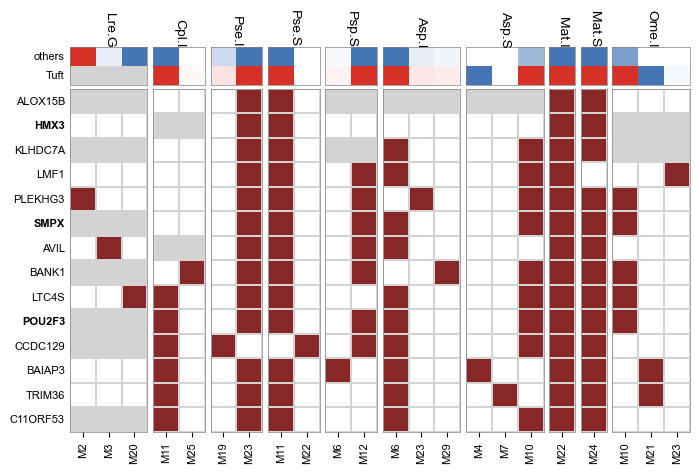

In [19]:
#Tuft
order = [ 'Lja.G','Cpl.I','Pse.I','Pse.S','Psp.S','Asp.I','Pbu.S','Mat.I','Mat.S','Ome.I']#Tuft
order = ['Lre.G','Cpl.I', 'Pse.I','Pse.S','Psp.S','Asp.I','Asp.S','Mat.I','Mat.S','Ome.I']
target_gene=[
'ALOX15B',
 'HMX3',
 'KLHDC7A',
 'LMF1',
 'PLEKHG3',
 'SMPX',
 'AVIL',
 'BANK1',
 'LTC4S',
 'POU2F3',
 'CCDC129',
 'BAIAP3',
 'TRIM36',
 'C11ORF53',

 ]
celltype_mapper = {
    'Tuft':'Tuft',
    'Mucous':'Tuft'     
    
}

DrawHeatMap(order,target_gene,celltype_mapper,
            h_counts=[1,9],
            figuresize=(8,5),
            save='Tuft_heatmap_0929.pdf'
            )

(12, 5)
['others', 'Mucus', 'Goblet']
1
               M2   M3   M4   M9  M12  M14
FAM3D        -1.0 -1.0 -1.0 -1.0 -1.0 -1.0
FER1L6        1.0  0.0  0.0  0.0  0.0  0.0
GALNT3        0.0  0.0  0.0  1.0  0.0  0.0
ANKDD1B       0.0  0.0  0.0  0.0  0.0  0.0
SPDEF         0.0  0.0  0.0  0.0  0.0  0.0
STARD10       0.0  0.0  0.0  1.0  0.0  0.0
SYTL2         0.0  0.0  0.0  0.0  0.0  0.0
DNAJC10       0.0  0.0  0.0  0.0  0.0  0.0
AGR2          0.0  0.0  0.0  0.0  0.0  0.0
ACBD3         0.0  0.0  0.0  0.0  0.0  1.0
ANO7          0.0  0.0  0.0  0.0  0.0  0.0
COPB1         0.0  0.0  0.0  0.0  0.0  1.0
ERN2          0.0  0.0  0.0  0.0  0.0  0.0
ERP44         0.0  0.0  0.0  0.0  0.0  1.0
GALNT12       0.0  0.0  0.0  0.0  0.0  0.0
GALNT6        0.0  0.0  1.0  0.0  0.0  0.0
GFPT1         0.0  0.0  0.0  0.0  0.0  0.0
GMDS          0.0  0.0  0.0  0.0  0.0  0.0
GNE           0.0  0.0  0.0  0.0  0.0  0.0
KRTCAP2       0.0  0.0  0.0  0.0  0.0  1.0
MYO5C        -1.0 -1.0 -1.0 -1.0 -1.0 -1.0
SLC35A3       

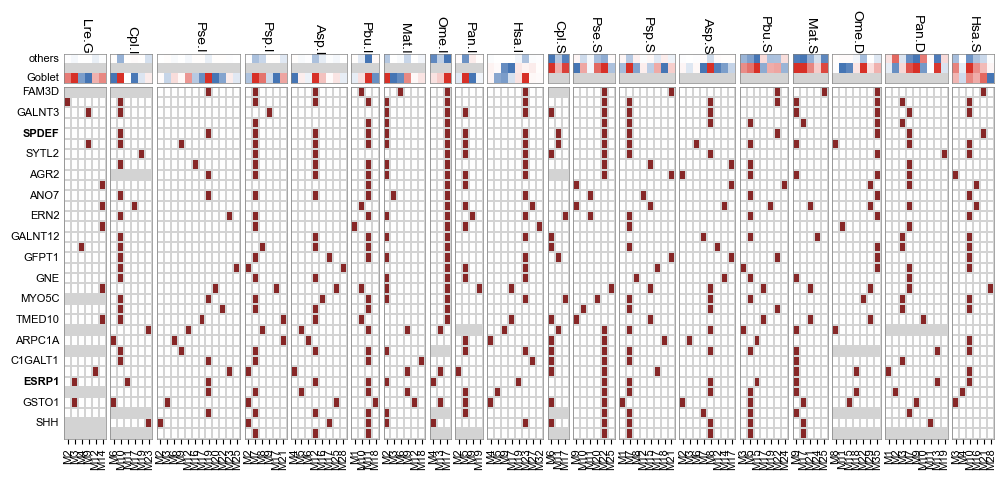

In [ ]:

#Goblet_Mucus
order = ['Lre.G','Cpl.I','Pse.I','Psp.I','Asp.I','Pbu.I','Mat.I','Ome.I','Pan.I','Hsa.I','Cpl.S','Pse.S','Psp.S','Asp.S','Pbu.S','Mat.S','Ome.D','Pan.D','Hsa.S',]

target_gene=[
# common
'FAM3D',
 'FER1L6',
 'GALNT3',
 'ANKDD1B',
 'SPDEF',
 'STARD10',
 'SYTL2',
 'DNAJC10',
 'AGR2',
 #Goblet
 'ACBD3',
 'ANO7',
 'COPB1',
 'ERN2',
 'ERP44',
 'GALNT12',
 'GALNT6',
 'GFPT1',
 'GMDS',
 'GNE',
 'KRTCAP2',
 'MYO5C',
 'SLC35A3',
 'TMED10',

 #Mucus
  'AREG',
 'ARPC1A',
 'BCAS1',
 'C1GALT1',
 'CORO2A',
 'ESRP1',
 'FBLIM1',
 'GSTO1',
 'POC1B-GALNT4',
 'SHH',
 'SYT8'
    ]
celltype_mapper = {
    'Goblet':'Goblet',
    'Goblet-like':'Goblet' , 
    'Mucus':'Mucus',
    'Foveolar':'Mucus',
    'Mucus-like':'Mucus', 
}

DrawHeatMap(order,target_gene,celltype_mapper,
            h_counts=[1,12],
            figuresize=(12,5),
            save='Goblet_Mucus_heatmap_0925.pdf'
            )

(12, 7)
['others', 'Enterocytes']
1
         M2   M3   M4   M5   M8  M12  M15  M16  M17  M18
A1CF    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
ABCG2   0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0
FABP1   1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
FABP2   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
ABCG5  -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0
...     ...  ...  ...  ...  ...  ...  ...  ...  ...  ...
DPP4    0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0
ENPEP   0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0
ENPP7   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
EPS8L3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
ETHE1   0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0

[86 rows x 10 columns]
Index(['M2', 'M3', 'M4', 'M5', 'M8', 'M12', 'M15', 'M16', 'M17', 'M18'], dtype='object')
2
Lre.G
                    M2   M3        M4        M5        M8       M12      M15  \
tmp.celltype                                                                   

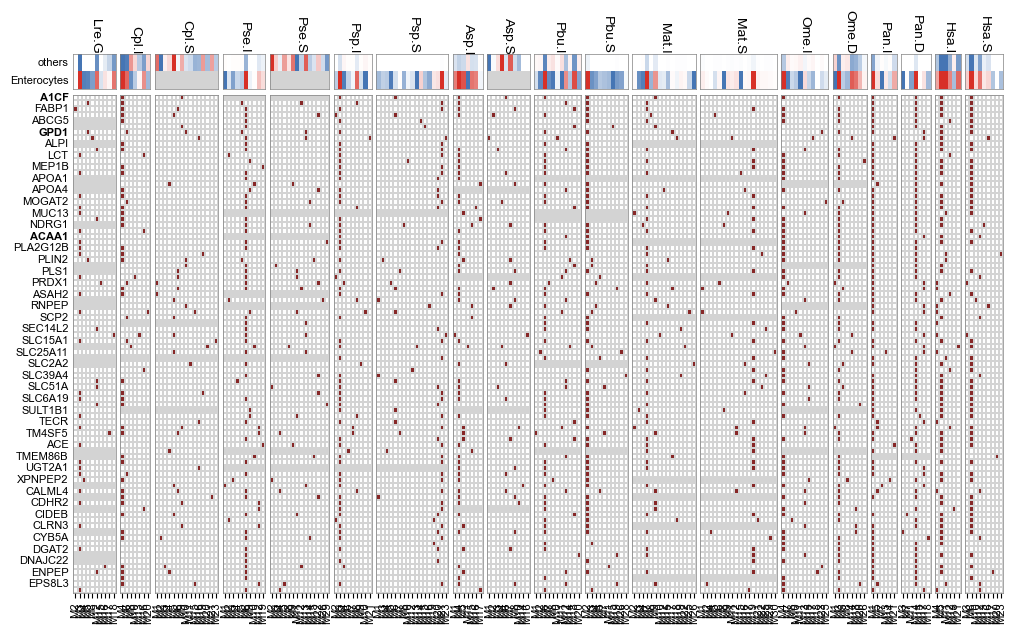

In [ ]:
#Enterocyte
order = ['Lre.G','Cpl.I','Cpl.S','Pse.I','Pse.S','Psp.I','Psp.S','Asp.I','Asp.S','Pbu.I','Pbu.S','Mat.I','Mat.S','Ome.I','Ome.D','Pan.I','Pan.D','Hsa.I','Hsa.S']
target_gene = [
# 'A1CF', 'ABCG2', 'FABP1', 'FABP2', 'ABCG5', 'GOLT1A', 'GPD1', 'HADHA', 'ALPI', 'ANPEP', 'LCT', 'AOC1', 'MEP1B', 'MGAM', 'APOA1', 'MISP', 'APOA4', 'APOB', 'MOGAT2', 'MTTP', 'MUC13', 'NAALADL1', 'NDRG1', 'NPC1L1', 'ACAA1', 'PDZK1', 'PLA2G12B', 'PLB1', 'PLIN2', 'PLIN3', 'PLS1', 'ARL14', 'PRDX1', 'RIDA', 'ASAH2', 'RNF128', 'RNPEP', 'SCCPDH', 'SCP2', 'SDSL', 'SEC14L2', 'ATP5F1D', 'SLC15A1', 'SLC20A1', 'SLC25A11', 'SLC28A1', 'SLC2A2', 'SLC2A5', 'SLC39A4', 'SLC3A1', 'SLC51A', 'SLC5A1', 'SLC6A19', 'SLC7A9', 'SULT1B1', 'SUSD2', 'TECR', 'TM4SF4', 'TM4SF5', 'TM6SF2', 'ACE', 'TMEM37', 'TMEM86B', 'ACE2', 'UGT2A1', 'VIL1', 'XPNPEP2', 'C4ORF33', 'CALML4', 'ACSL5', 'CDHR2', 'CDX1', 'CIDEB', 'CLDN15', 'CLRN3', 'CREB3L3', 'CYB5A', 'CYP2J2', 'DGAT2', 'DHRS11', 'DNAJC22', 'DPP4', 'ENPEP', 'ENPP7', 'EPS8L3', 'ETHE1'
'ABCG5',
'APOA1',
'APOA4',
'ARL14',
'ASAH2',
'C4ORF33',
'CDX1',
'DGAT2',
'DNAJC22',
'ENPP7',
'EPS8L3',
'LCT',
'MUC13',
'NPC1L1',
'PLA2G12B',
'PLB1',
'PLIN2',
'SEC14L2',
'SLC20A1',
'SLC28A1',
'SLC2A5', 
'TM4SF4', 
'TMEM86B', 
'UGT2A1'
]
celltype_mapper = {
    'Enterocytes-like':'Enterocytes',
    'Enterocytes':'Enterocytes'
}

DrawHeatMap(order,target_gene,celltype_mapper,
            h_counts=[1,14],
            figuresize=(12,7)
            ,save='Enterocyte_heatmap_0929.pdf'
            )

In [ ]:

# order = ['Ome.I','Mat.I','Psp.I','Pan.I','Pse.I','Cpl.I','Lja.G','Pbu.I','Asp.I','Hsp.I' ] #单肠
# order = ['Ome.S','Mat.S','Psp.S','Pan.S','Pse.S','Cpl.S','Lja.G','Pbu.S','Asp.S','Hsp.S' ] #单胃

# order = ['Ome.I','Psp.I','Pan.I','Pse.I','Asp.I','Mat.I','Pbu.I','Cpl.I','Lja.G','Hsp.I' ]
# order = ['Ome.I','Pbu.I','Mat.I','Asp.I','Cpl.I','Lja.G']

order = ['Lja.G','Cpl.I','Cpl.S','Ome.I','Ome.S','Pse.I','Asp.I',]#BEST4
order = ['Lja.G','Cpl.S','Pse.S','Psp.S','Asp.S','Pbu.S','Mat.S','Ome.S','Pan.S','Hsp.S' ]#Oxynticopeptic
order = ['Cpl.I','Cpl.S','Pse.I','Pse.S','Psp.I','Psp.S','Asp.I','Asp.S','Pbu.I','Pbu.S','Mat.I','Mat.S','Ome.I','Ome.S','Pan.I','Pan.S','Hsp.I','Hsp.S']#主图3
order = ['Lja.G','Cpl.I','Cpl.S','Pse.I','Pse.S','Psp.I','Psp.S','Asp.I','Asp.S','Pbu.I','Pbu.S','Mat.I','Mat.S','Ome.I','Ome.S','Pan.I','Pan.S','Hsp.I','Hsp.S']#Ciliated、T cells、
#Enterocyte/Myeloid_Bcells/Goblet_Mucus

order = [ 'Lja.G','Cpl.I','Pse.I','Pse.S','Psp.S','Asp.I','Pbu.S','Mat.I','Mat.S','Ome.I',]#Tuft
order = ['Lja.G','Cpl.I','Pse.I','Psp.I','Asp.I','Pbu.I','Mat.I','Ome.I','Pan.I','Hsp.I','Cpl.S','Pse.S','Psp.S','Asp.S','Pbu.S','Mat.S','Ome.S','Pan.S','Hsp.S',]